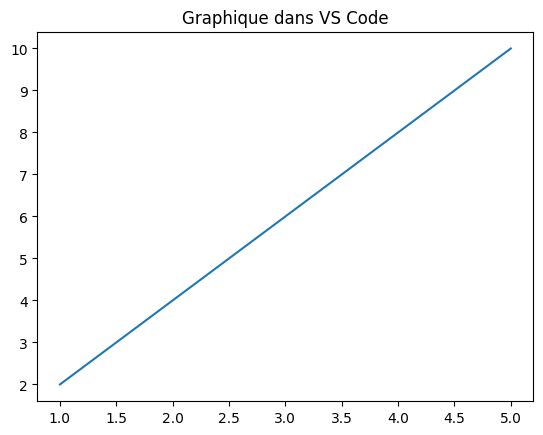

In [ ]:
#test
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.title("Graphique dans VS Code")
plt.show()


In [ ]:
import pandas as pd

df =pd.read_excel(r'C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx')
df.columns


Index(['Généticien', 'N Famille', 'Sexe', 'Type histologique', 'site',
       'Age de survenue', 'Stade TNM', 'Commentaire', 'statut BRAF',
       'Antecedents familiaux', 'Statut MSI', 'IHC MMR',
       'Méthylation MLH1 ( 2nd evenement de tumeur )', 'Commentaire.1',
       'Mutation', 'Classe de la mutation', 'MUTATION', 'muté/methylé'],
      dtype='object')

In [ ]:
#content le nombre d'occurence d'une chaine de caractere dans une colonne ( la les cancers du colon selon les types de lynch )
occur_colon = (df["muté/methylé"]=="methylé")& df["site"].str.contains(r"\bcolon\b", case=False, na=False)
tot_col= occur_cancer.sum()
print(tot_col)



40


In [ ]:
#content le nombre d'occurence d'une chaine de caractere dans une colonne ( la les cancers du endomètres selon les types de lynch )
occur_endometre = (df["muté/methylé"]=="methylé")& df["site"].str.contains(r"\bendometre\b|\bendomètre\b|\buterus\b|\butérus\b", case=False, na=False)
tot_endo= occur_endometre.sum()
print(tot_endo)


13


In [ ]:
#nombre de patients muté
print((df["muté/methylé"]== "muté ").sum())
#nombre de patients methylé 
print((df["muté/methylé"]== "methylé").sum())

44
51


9


In [ ]:
import pandas as pd

df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")  

# Compter les lignes avec au moins une virgule dans la colonne s* c'est x espace et S+ un ou plusieurs caractéres hors espaces
count = ((df["muté/methylé"].str.strip()=="methylé") & df["Age de survenue"].astype(str).str.contains(r"\S+\s*[,.]\s*\S+", na=False))
c = count.sum()
print(f"Nombre de lignes avec virgule(s) : {c}")

Nombre de lignes avec virgule(s) : 19


In [ ]:
#ajouter une ligne pour les cancers multiples
df['cancer multiples']= df["Age de survenue"].astype(str).str.contains(r"\S+\s*[,.]\s*\S+", na=False)
df.to_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx", index=False)

In [ ]:
# Créer une colonne booléenne pour voir le nombre de cancer (<45 ans 16/44 20/51 et) <50 27/44 vs 34/51    
df["premier cancer"] = (
    df["Age de survenue"]
    .astype(str)
    .str.split(r"[,.]")
    .str[0]
    .astype(float) < 50
)

ok= ((df["premier cancer"] == True) & (df["muté/methylé"] == "muté ")).sum()
print(ok)

df.to_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx", index=False)

22


34


In [ ]:
df["Antecedents familiaux"].unique()

array(['Beth', 'Am', 'Beth ', 'Beth(age)', 'NR', 'Non',
       "Beth ??? ( je crois que c'est le patient adopté )", nan, 'non',
       'Beth (age)', 'beth (age)', 'Beth (age )', 'Amsterdam',
       'Amsterdam (secondaire )', 'beth', 'amsterdam', 'beth(age)'],
      dtype=object)

C:\Users\stude\AppData\Local\Temp\ipykernel_6724\1485038086.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Groupe", y="Âge", data=df, palette=["#1f77b4", "#ff7f0e"])


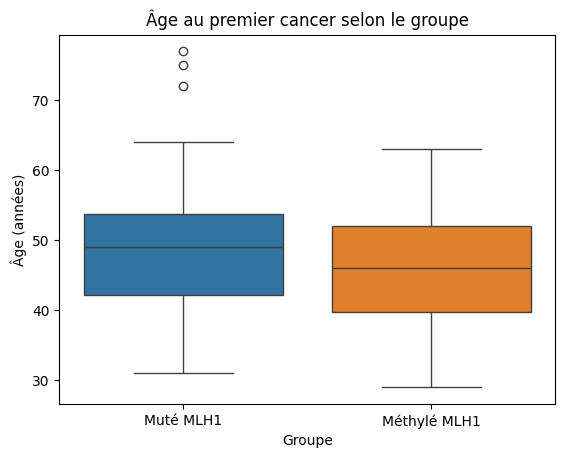

In [ ]:
#BOXPLOT age

mute = [31, 32, 32, 34, 37, 37, 39, 40, 40, 41, 42, 42, 43, 43, 45, 45, 45, 46, 46, 46, 48, 49, 49, 49, 49, 50, 50, 51, 51, 52, 52, 52, 53, 53, 54, 54, 56, 56, 59, 61, 62, 63, 64, 72, 75, 77]
methyle = [30, 29, 29, 29, 30, 34, 35, 36, 36, 36, 37, 37, 39, 40, 41, 41, 41, 42, 42, 43, 44, 45, 45, 45, 46, 46, 46, 47, 48, 48, 49, 49, 49, 49, 49, 50, 50, 52, 52, 52, 52, 53, 53, 53, 55, 56, 56, 56, 57, 57, 58, 63]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Transformer en DataFrame
df = pd.DataFrame({
    "Âge": mute + methyle,
    "Groupe": ["Muté MLH1"]*len(mute) + ["Méthylé MLH1"]*len(methyle)
})

# Faire le boxplot
sns.boxplot(x="Groupe", y="Âge", data=df, palette=["#1f77b4", "#ff7f0e"])

plt.title("Âge au premier cancer selon le groupe")
plt.ylabel("Âge (années)")
plt.show()


  muté/methylé    premier cancer <50 ans   n
0      methylé   premier cancer >=50 ans  17
1      methylé   premier cancer =<50 ans  34
2        muté    premier cancer >=50 ans  17
3        muté    premier cancer =<50 ans  27


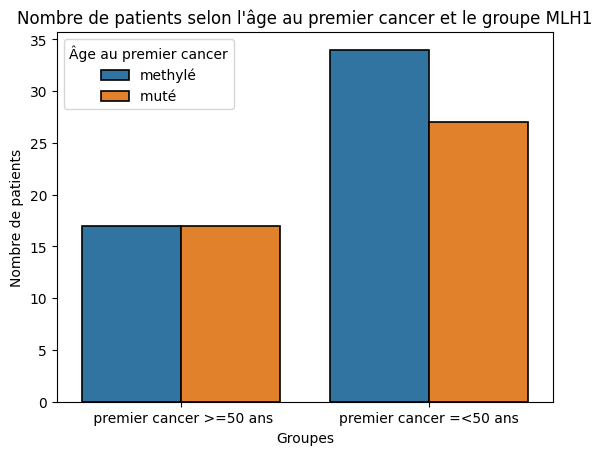

In [ ]:
#diagramme en barre groupé valeurs absolu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")

dat = df.groupby(["muté/methylé","premier cancer <50 ans"]).size().reset_index(name="n")
dat["premier cancer <50 ans"]=dat["premier cancer <50 ans"].map({0 :" premier cancer >=50 ans", 1 :"premier cancer =<50 ans"})
print(dat)

sns.barplot(data=dat, x=dat["premier cancer <50 ans"] , y="n", hue="muté/methylé",
            palette=["#1f77b4","#ff7f0e"],edgecolor="black",
    linewidth=1.2)

plt.title("Nombre de patients selon l'âge au premier cancer et le groupe MLH1")
plt.ylabel("Nombre de patients")
plt.xlabel("Groupes")
plt.legend(title="Âge au premier cancer")
plt.show()

  muté/methylé  premier cancer <50 ans   n  pourcentage
0      methylé  premier cancer ≥50 ans  17    33.333333
1      methylé  premier cancer <50 ans  34    66.666667
2        muté   premier cancer ≥50 ans  17    38.636364
3        muté   premier cancer <50 ans  27    61.363636


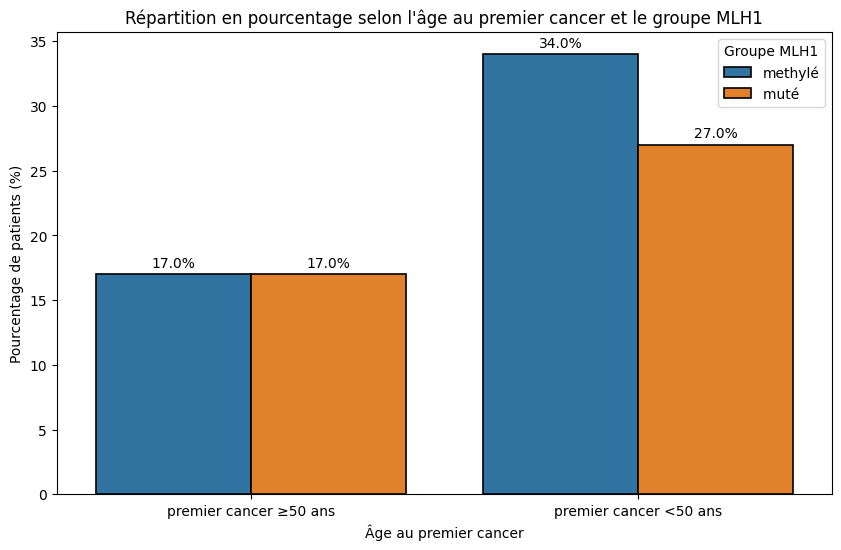

Tableau de données avec pourcentages :
  muté/methylé  premier cancer <50 ans   n  pourcentage
0      methylé  premier cancer ≥50 ans  17    33.333333
1      methylé  premier cancer <50 ans  34    66.666667
2        muté   premier cancer ≥50 ans  17    38.636364
3        muté   premier cancer <50 ans  27    61.363636


In [ ]:
#diagramme en barre groupé pourcentage


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")

# Compter le nombre de patients par groupe
data = df.groupby(["muté/methylé", "premier cancer <50 ans"]).size().reset_index(name="n")

# Calculer les pourcentages par groupe
total_par_groupe = data.groupby("muté/methylé")["n"].transform('sum')
data["pourcentage"] = (data["n"] / total_par_groupe) * 100

# Renommer pour lisibilité
data['premier cancer <50 ans'] = data['premier cancer <50 ans'].map({0: "premier cancer ≥50 ans", 1: "premier cancer <50 ans"})

print(data)
# Diagramme en barres groupées en pourcentage
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="premier cancer <50 ans", y="n", hue="muté/methylé",
            palette=["#1f77b4", "#ff7f0e"],edgecolor="black",
    linewidth=1.2)

plt.title("Répartition en pourcentage selon l'âge au premier cancer et le groupe MLH1")
plt.ylabel("Pourcentage de patients (%)")
plt.xlabel("Âge au premier cancer")
plt.legend(title="Groupe MLH1")

# Ajouter les valeurs de pourcentage sur les barres
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', fontsize=10, padding=3)

plt.show()

# Afficher le tableau de données pour vérification
print("Tableau de données avec pourcentages :")
print(data[["muté/methylé", "premier cancer <50 ans", "n", "pourcentage"]])

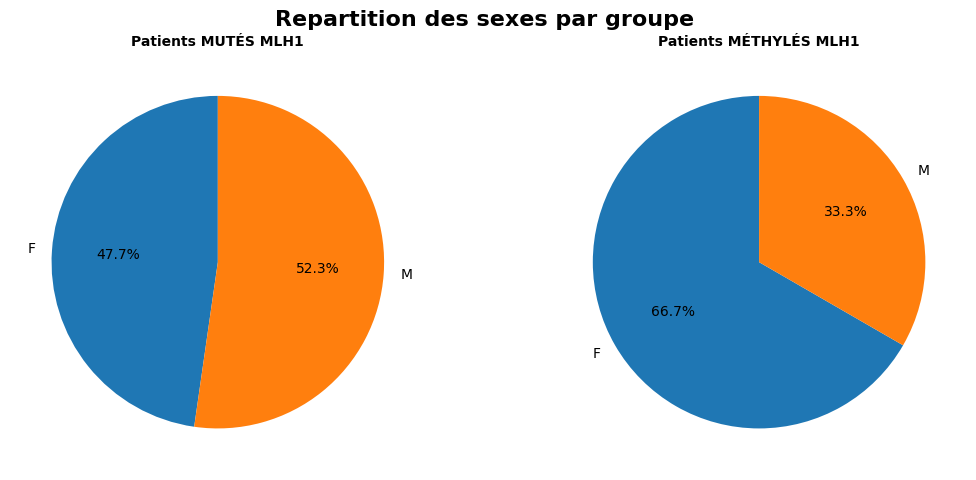

In [ ]:
#pourcentage des sexes dans chaque groupe
import pandas as pd

df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")
df["Sexe"]= df["Sexe"].str.lower().str.strip()
df["muté/methylé"]=df["muté/methylé"].str.strip()
data= df.groupby(["muté/methylé","Sexe"]).size().reset_index(name="n")

s= data.groupby('muté/methylé')["n"].transform("sum")
data["pourcent"] = (data["n"]/s)*100

# 1. Création de la figure avec 2 camemberts côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# 2. Camembert pour les MUTÉS
muté_data = data[data['muté/methylé'] == 'muté']
ax1.pie(muté_data['pourcent'], 
        labels=[f"{sexe.upper()}" for sexe in muté_data['Sexe']],
        autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e'],  # Bleu pour H, Orange pour F
        startangle=90)
ax1.set_title('Patients MUTÉS MLH1', fontweight='bold', fontsize=10)

# 3. Camembert pour les MÉTHYLÉS
methylé_data = data[data['muté/methylé'] == 'methylé']
ax2.pie(methylé_data['pourcent'], 
        labels=[f"{sexe.upper()}" for sexe in methylé_data['Sexe']],
        autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e'],  # Mêmes couleurs
        startangle=90)
ax2.set_title('Patients MÉTHYLÉS MLH1', fontweight='bold', fontsize=10)

# 4. Ajouter une légende globale
plt.suptitle('Repartition des sexes par groupe ', 
             fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()

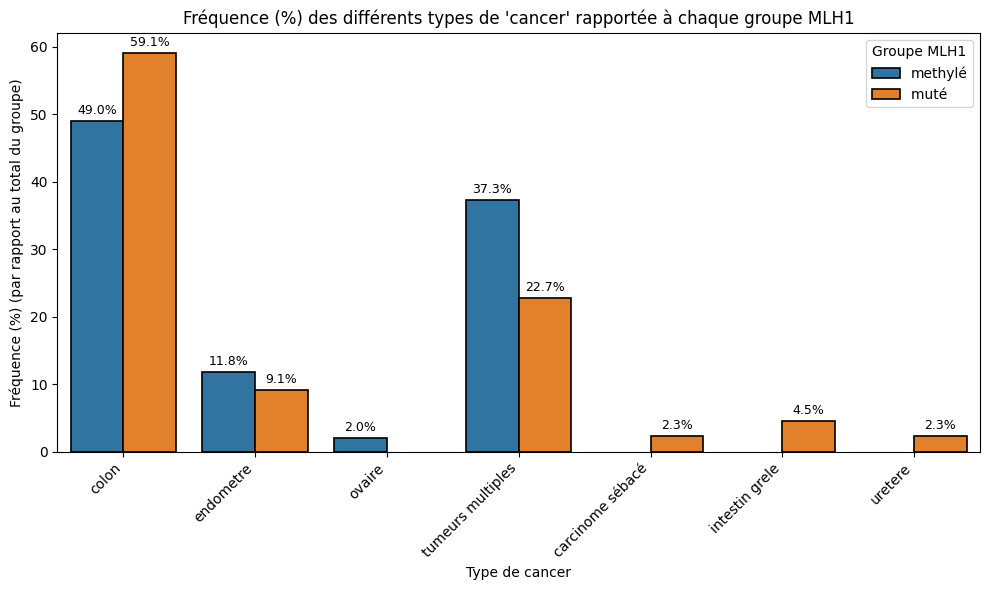

In [ ]:
#repartition des differents types de cancers selon le groupe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
file_path = r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Garder uniquement les colonnes nécessaires
subset = df[["cancer multiples", "muté/methylé"]].copy()
subset["cancer multiples"] = subset["cancer multiples"].astype(str).str.strip()

# Compter les cas par combinaison
count_df = (
    subset.groupby(["muté/methylé", "cancer multiples"])
    .size()
    .reset_index(name="n")
)

# Ajouter le total par groupe
totaux = count_df.groupby("muté/methylé")["n"].transform("sum")
count_df["pourcentage"] = 100 * count_df["n"] / totaux

# Création du graphique
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=count_df,
    x="cancer multiples",
    y="pourcentage",
    hue="muté/methylé",
    palette=["#1f77b4", "#ff7f0e"],edgecolor="black",
    linewidth=1.2
)

# Ajouter les pourcentages au-dessus des barres
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # n'afficher que si > 0
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black',
                    xytext=(0, 3), textcoords='offset points')


plt.title("Fréquence (%) des différents types de 'cancer' rapportée à chaque groupe MLH1")
plt.ylabel("Fréquence (%) (par rapport au total du groupe)")
plt.xlabel("Type de cancer")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Groupe MLH1")
plt.tight_layout()
plt.show()


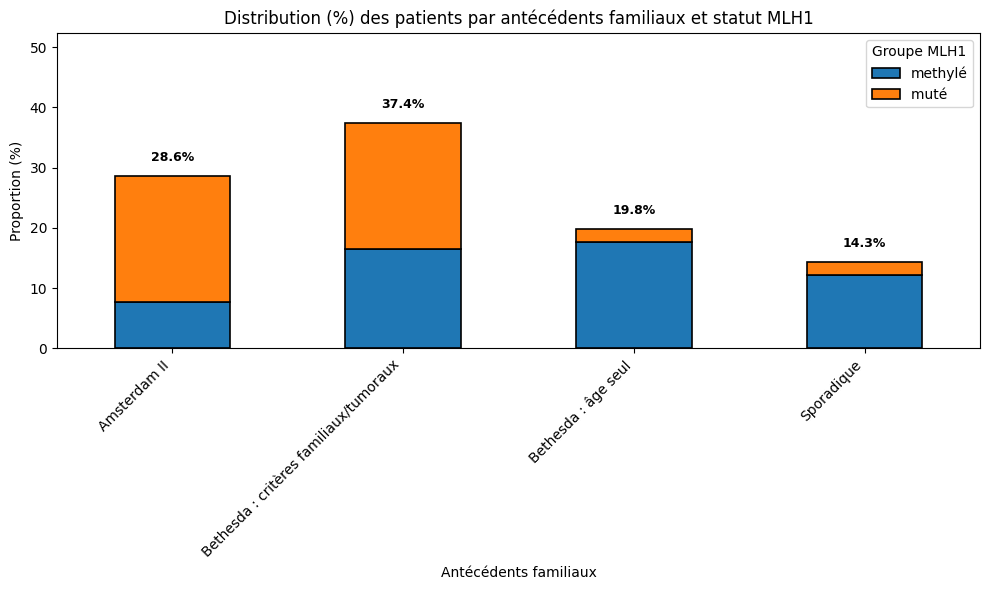

Répartition (%) muté vs méthylé pour chaque label :
muté/methylé                            methylé  muté 
Antecedents familiaux                                 
Amsterdam II                               26.9   73.1
Bethesda : critères familiaux/tumoraux     44.1   55.9
Bethesda : âge seul                        88.9   11.1
Sporadique                                 84.6   15.4


In [ ]:
#REPARTIION DES ANTECEDENTS FAMILIAUX
import pandas as pd
import matplotlib.pyplot as plt

# Charger ton fichier
file_path = r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Garder uniquement les colonnes nécessaires + nettoyage
subset = df[["Antecedents familiaux", "muté/methylé"]].copy()
subset["Antecedents familiaux"] = (
    subset["Antecedents familiaux"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s*\(", "(", regex=True)  # supprime espaces avant (
    .str.replace(r"\s+", " ", regex=True)    # supprime espaces multiples
)

# Retirer les "NR"
subset = subset[subset["Antecedents familiaux"] != "NR"]

# Effectifs par combinaison
count_df = subset.groupby(["Antecedents familiaux", "muté/methylé"]).size().reset_index(name="n")

# Tableau croisé
pivot_df = count_df.pivot(index="Antecedents familiaux", columns="muté/methylé", values="n").fillna(0)

# Calcul des proportions sur l'ensemble des patients
pivot_prop = pivot_df.div(pivot_df.values.sum()) * 100

# Tracer les barres empilées
ax = pivot_prop.plot(kind="bar", stacked=True, figsize=(10,6), color=["#1f77b4", "#ff7f0e"],edgecolor="black", linewidth=1.2)

# Ajouter le total (somme des % muté+methylé) au-dessus de chaque barre
totals = pivot_prop.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 2, f"{total:.1f}%", ha='center', va='bottom', fontsize=9, fontweight="bold")

plt.title("Distribution (%) des patients par antécédents familiaux et statut MLH1")
plt.ylabel("Proportion (%)")
plt.xlabel("Antécédents familiaux")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(totals) + 15)
plt.legend(title="Groupe MLH1")
plt.tight_layout()
plt.show()


# Calcul des pourcentages par label
prop_by_label = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Arrondir pour plus de lisibilité
prop_by_label = prop_by_label.round(1)

print("Répartition (%) muté vs méthylé pour chaque label :")
print(prop_by_label)


In [ ]:
import pandas as pd 

df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")

df["Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)"].str.strip().str.replace(r"\s+","",regex=True).unique()
df["IHC MMR"].str.strip().unique()

array([nan, 'M1/P2', 'P2', "conservation d'expression", 'M6', 'M1',
       'douteux'], dtype=object)

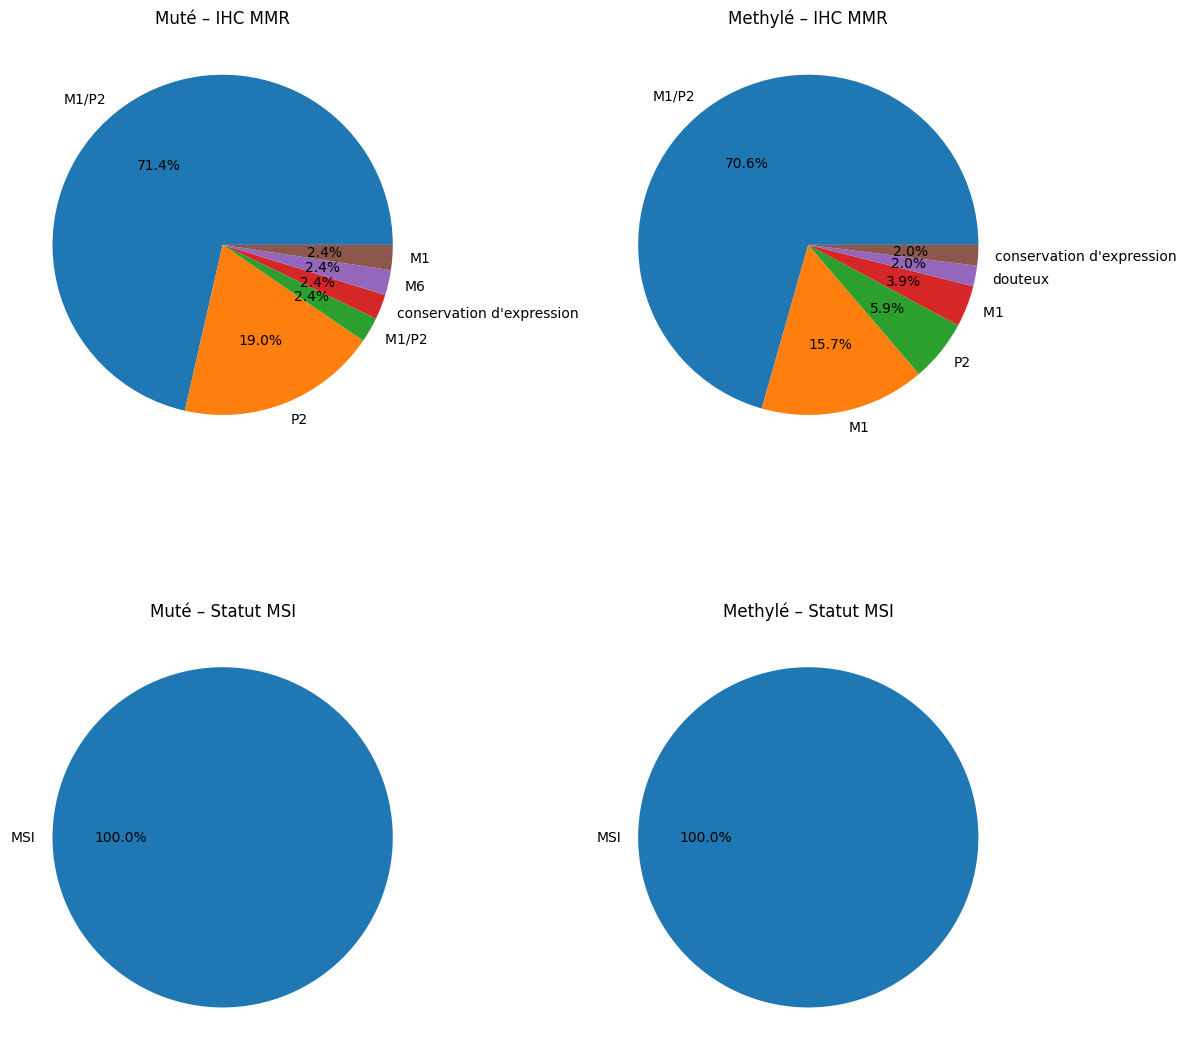

In [ ]:
#repartition des statut MMR MSI selon les groupes
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier
df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")

# Nettoyer la colonne muté/methylé
df['muté/methylé'] = df['muté/methylé'].str.strip().str.lower()

# Définir les groupes
groupes = ['muté', 'methylé']

# Couleurs pour les camemberts
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5'
]

plt.figure(figsize=(12,12))

# 1️⃣ & 2️⃣ Camemberts par IHC MMR
for i, groupe in enumerate(groupes):
    data_statut = df[df['muté/methylé'] == groupe]['IHC MMR'].value_counts()
    plt.subplot(2, 2, i+1)
    plt.pie(data_statut, labels=data_statut.index, autopct='%1.1f%%', colors=colors[:len(data_statut)])
    plt.title(f"{groupe.capitalize()} – IHC MMR")

# 3️⃣ & 4️⃣ Camemberts par Statut MSI
for i, groupe in enumerate(groupes):
    data_statut = (
    df[df['muté/methylé'] == groupe]['Statut MSI ( D00026 C\'ÉTAIT LE SEUL MSI L tous les autres était H)']
    .astype(str)
    .str.upper()
    .str.strip()
    .replace(['NR', 'N/R', 'N R', 'NON RENSEIGNE', 'NON FAIT',"NAN"], pd.NA)
    .dropna()
    .value_counts())
    plt.subplot(2, 2, i+3)
    plt.pie(data_statut, labels=data_statut.index, autopct='%1.1f%%', colors=colors[:len(data_statut)])
    plt.title(f"{groupe.capitalize()} – Statut MSI")

plt.tight_layout()
plt.show()


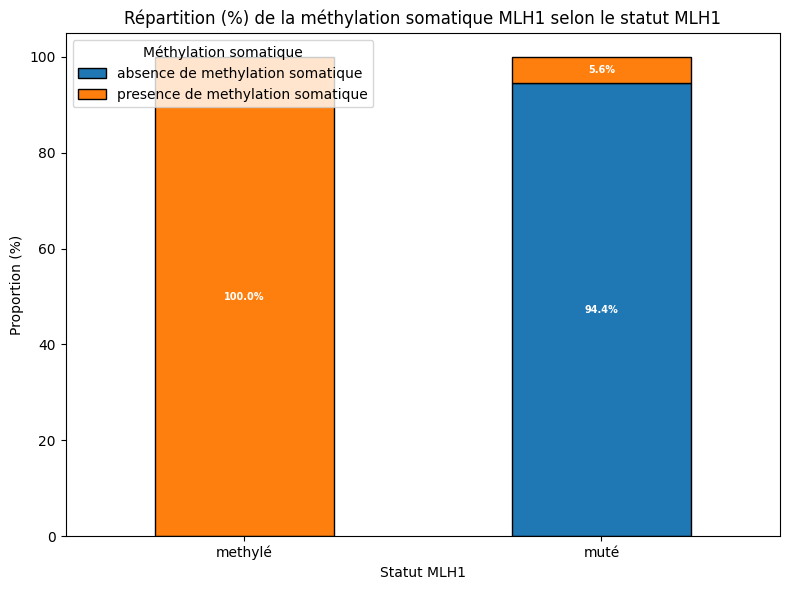

In [ ]:
#Repartition de la methylation MLH1  somatique
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier
df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")

# Normaliser les colonnes utilisées
df["muté/methylé"] = df["muté/methylé"].astype(str).str.strip().str.lower()
df["Méthylation MLH1 ( 2nd evenement de tumeur )"] = (
    df["Méthylation MLH1 ( 2nd evenement de tumeur )"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Retirer les "nr" ou "nan" de la colonne méthylation
subset = df[
    (df["Méthylation MLH1 ( 2nd evenement de tumeur )"] != "nr")
    & (df["Méthylation MLH1 ( 2nd evenement de tumeur )"] != "nan")
]

# Ne garder que les colonnes nécessaires
subset = subset[["muté/methylé", "Méthylation MLH1 ( 2nd evenement de tumeur )"]]

# Comptage par groupe et statut
count_df = (
    subset
    .groupby(["muté/methylé", "Méthylation MLH1 ( 2nd evenement de tumeur )"])
    .size()
    .reset_index(name="n")
)

# Tableau croisé
pivot_df = count_df.pivot(
    index="muté/methylé",
    columns="Méthylation MLH1 ( 2nd evenement de tumeur )",
    values="n"
).fillna(0)

# Calcul des pourcentages
pivot_prop = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Tracer le diagramme en barres empilées
colors = ["#1f77b4", "#ff7f0e"]  # bleu = absence, orange = présence
ax = pivot_prop.plot(kind="bar", stacked=True, figsize=(8, 6), color=colors, edgecolor="black")

# Ajouter les pourcentages sur les barres
for i, (index, row) in enumerate(pivot_prop.iterrows()):
    cum_sum = 0
    for value in row:
        if value > 0:
            ax.text(
                i,
                cum_sum + value / 2,
                f"{value:.1f}%",
                ha="center",
                va="center",
                fontsize=7,
                color="white",
                fontweight="bold"
            )
        cum_sum += value

# Personnaliser le graphique
plt.title("Répartition (%) de la méthylation somatique MLH1 selon le statut MLH1")
plt.xlabel("Statut MLH1")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0)
plt.legend(title="Méthylation somatique")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Charger le fichier Excel
file_path = r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx"
df = pd.read_excel(file_path)

# Garder uniquement les colonnes nécessaires
subset = df[["muté/methylé", "age de la premiere tumeur lynch"]].copy()

# Nettoyer les données : convertir les âges en numériques, ignorer les valeurs manquantes
subset["age de la premiere tumeur lynch"] = pd.to_numeric(subset["age de la premiere tumeur lynch"], errors="coerce")

# Supprimer les lignes où l'âge est manquant
subset = subset.dropna(subset=["age de la premiere tumeur lynch"])

# Calcul de la moyenne d'âge pour chaque groupe (muté vs méthylé)
moyennes = subset.groupby("muté/methylé")["age de la premiere tumeur lynch"].mean()

# Afficher les résultats
print("Moyenne d'âge de la première tumeur Lynch par groupe :")
print(moyennes)

# Si tu veux un affichage plus lisible :
for groupe, moyenne in moyennes.items():
    print(f" - {groupe} : {moyenne:.1f} ans")


Moyenne d'âge de la première tumeur Lynch par groupe :
muté/methylé
methylé    45.392157
muté       48.522727
Name: age de la premiere tumeur lynch, dtype: float64
 - methylé : 45.4 ans
 - muté  : 48.5 ans


ANALYSE DES COEFFICIENTS - RÉGRESSION LOGISTIQUE
Nombre d'observations: 95
Répartition des classes: {'methylé': 51, 'muté': 44}

TOP 20 DES VARIABLES LES PLUS IMPORTANTES:
Antecedents familiaux_BETHESDA : ÂGE SEUL          | Coef:  -1.196 | OR:  0.302 | ↓ Favorise MUTÉ
Antecedents familiaux_SPORADIQUE                   | Coef:  -1.086 | OR:  0.337 | ↓ Favorise MUTÉ
IHC MMR_M1                                         | Coef:  -0.954 | OR:  0.385 | ↓ Favorise MUTÉ
cancer multiples_TUMEURS MULTIPLES                 | Coef:  -0.532 | OR:  0.588 | ↓ Favorise MUTÉ
cancer multiples_INTESTIN GRELE                    | Coef:   0.501 | OR:  1.651 | ↑ Favorise METHYLÉ
IHC MMR_MANQUANT                                   | Coef:   0.497 | OR:  1.644 | ↑ Favorise METHYLÉ
IHC MMR_P2                                         | Coef:   0.478 | OR:  1.613 | ↑ Favorise METHYLÉ
Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)_MSI | Coef:   0.343 | OR:  1.409 | ↑ Favorise METHYLÉ
age de la pr

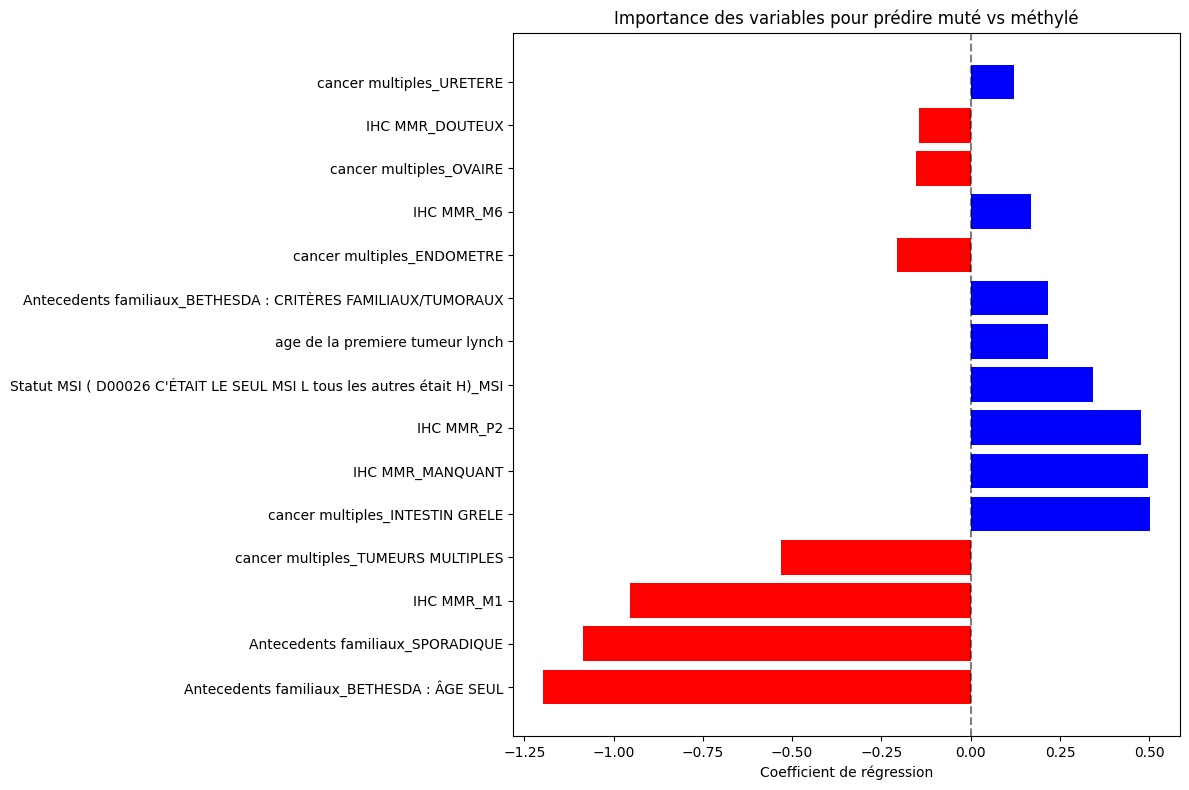


ANALYSE PAR CATÉGORIE DE VARIABLES:

Âge:
  age de la premiere tumeur lynch: Coef=0.218 (OR=1.243) - Favorise METHYLÉ

Antécédents:
  Antecedents familiaux_BETHESDA : ÂGE SEUL: Coef=-1.196 (OR=0.302) - Favorise MUTÉ
  Antecedents familiaux_SPORADIQUE: Coef=-1.086 (OR=0.337) - Favorise MUTÉ
  Antecedents familiaux_BETHESDA : CRITÈRES FAMILIAUX/TUMORAUX: Coef=0.217 (OR=1.243) - Favorise METHYLÉ
  Antecedents familiaux_MANQUANT: Coef=-0.041 (OR=0.960) - Favorise MUTÉ

Cancer multiples:
  cancer multiples_TUMEURS MULTIPLES: Coef=-0.532 (OR=0.588) - Favorise MUTÉ
  cancer multiples_INTESTIN GRELE: Coef=0.501 (OR=1.651) - Favorise METHYLÉ
  cancer multiples_ENDOMETRE: Coef=-0.206 (OR=0.814) - Favorise MUTÉ
  cancer multiples_OVAIRE: Coef=-0.153 (OR=0.858) - Favorise MUTÉ
  cancer multiples_URETERE: Coef=0.120 (OR=1.128) - Favorise METHYLÉ
  cancer multiples_COLON: Coef=0.057 (OR=1.059) - Favorise METHYLÉ

Statut MSI:
  Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)_MSI: 

In [ ]:
#regression logistique premiere, pas a utilisé car pas de groupement des modalités rares, pas de test stat, pas de regularisation efficace etc

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")

# Nettoyer la variable cible
df['target'] = df['muté/methylé'].str.strip().str.lower()
df = df[df['target'].isin(['muté', 'methylé'])].copy()

# Sélectionner les features
features = [
    'age de la premiere tumeur lynch', 
    'Antecedents familiaux', 
    'cancer multiples', 
    'Statut MSI ( D00026 C\'ÉTAIT LE SEUL MSI L tous les autres était H)', 
    'IHC MMR'
]

# Préparer les données
X = df[features].copy()
y = df['target']

# Nettoyage des features
X['age de la premiere tumeur lynch'] = pd.to_numeric(X['age de la premiere tumeur lynch'], errors='coerce')
X = X.dropna(subset=['age de la premiere tumeur lynch'])

# Nettoyer les variables catégorielles
for col in ['Antecedents familiaux', 'cancer multiples', 'Statut MSI ( D00026 C\'ÉTAIT LE SEUL MSI L tous les autres était H)', 'IHC MMR']:
    X[col] = X[col].astype(str).str.strip().str.upper()
    X[col] = X[col].replace(['NAN', 'NR', 'N/R', 'N R', 'NON RENSEIGNE', 'NON FAIT', 'NA', 'N/A'], 'MANQUANT')

# Identifier les types de colonnes
numeric_features = ['age de la premiere tumeur lynch']
categorical_features = ['Antecedents familiaux', 'cancer multiples', 
                       'Statut MSI ( D00026 C\'ÉTAIT LE SEUL MSI L tous les autres était H)', 
                       'IHC MMR']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_features)
    ])

# Appliquer le preprocessing
X_processed = preprocessor.fit_transform(X)
y_processed = y[X.index]  # Garder les y correspondants

# Obtenir les noms des features après one-hot encoding
feature_names = (numeric_features + 
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

# Entraîner la régression logistique
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l2',
    C=0.5)  # diminue C pour augmenter la régularisation
model.fit(X_processed, y_processed)

# Analyser les coefficients
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# Créer un dataframe pour l'analyse
feature_analysis = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'odds_ratio': odds_ratios,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

# Afficher les résultats
print("=" * 80)
print("ANALYSE DES COEFFICIENTS - RÉGRESSION LOGISTIQUE")
print("=" * 80)
print(f"Nombre d'observations: {len(X_processed)}")
print(f"Répartition des classes: {pd.Series(y_processed).value_counts().to_dict()}")
print("\n" + "=" * 80)
print("TOP 20 DES VARIABLES LES PLUS IMPORTANTES:")
print("=" * 80)

for i, row in feature_analysis.head(20).iterrows():
    direction = "↑ Favorise METHYLÉ" if row['coefficient'] > 0 else "↓ Favorise MUTÉ"
    print(f"{row['feature']:50} | Coef: {row['coefficient']:7.3f} | OR: {row['odds_ratio']:6.3f} | {direction}")

# Visualisation des coefficients les plus importants
plt.figure(figsize=(12, 8))
top_features = feature_analysis.head(15)
colors = ['red' if coef < 0 else 'blue' for coef in top_features['coefficient']]

plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient de régression')
plt.title('Importance des variables pour prédire muté vs méthylé')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Analyse par catégorie de variables
print("\n" + "=" * 80)
print("ANALYSE PAR CATÉGORIE DE VARIABLES:")
print("=" * 80)

categories = {
    'Âge': [f for f in feature_names if 'age' in f.lower()],
    'Antécédents': [f for f in feature_names if any(x in f.lower() for x in ['antecedent', 'familiaux', 'amsterdam', 'bethesda', 'sporadique'])],
    'Cancer multiples': [f for f in feature_names if 'cancer multiples' in f.lower()],
    'Statut MSI': [f for f in feature_names if 'statut msi' in f.lower()],
    'IHC MMR': [f for f in feature_names if 'ihc mmr' in f.lower()]
}

for category, features_in_category in categories.items():
    if features_in_category:
        cat_df = feature_analysis[feature_analysis['feature'].isin(features_in_category)]
        if not cat_df.empty:
            print(f"\n{category}:")
            for _, row in cat_df.iterrows():
                direction = "Favorise METHYLÉ" if row['coefficient'] > 0 else "Favorise MUTÉ"
                print(f"  {row['feature']}: Coef={row['coefficient']:.3f} (OR={row['odds_ratio']:.3f}) - {direction}")

# Statistiques descriptives par groupe
print("\n" + "=" * 80)
print("STATISTIQUES DESCRIPTIVES PAR GROUPE:")
print("=" * 80)

df_analysis = df[df['target'].isin(['muté', 'methylé'])].copy()
df_analysis['age de la premiere tumeur lynch'] = pd.to_numeric(df_analysis['age de la premiere tumeur lynch'], errors='coerce')

print("\nÂge moyen au premier cancer Lynch:")
print(df_analysis.groupby('target')['age de la premiere tumeur lynch'].agg(['mean', 'std', 'count']))

print("\nDistribution des antécédents familiaux:")
print(pd.crosstab(df_analysis['Antecedents familiaux'], df_analysis['target']))

print("\nDistribution des cancers multiples:")
print(pd.crosstab(df_analysis['cancer multiples'], df_analysis['target']))

In [ ]:
#moyenne d'age par cancer chez patients methylé 

import pandas as pd

# Charger les données
df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")

# Nettoyer les colonnes
df['age de la premiere tumeur lynch'] = pd.to_numeric(df['age de la premiere tumeur lynch'], errors='coerce')
df['cancer multiples'] = df['cancer multiples'].astype(str).str.strip().str.upper()
df['muté/methylé'] = df['muté/methylé'].astype(str).str.strip().str.lower()

# Filtrer uniquement les patients methylé
df_methyle = df[df['muté/methylé'] == 'methylé']

# Filtrer les données valides
df_clean = df_methyle.dropna(subset=['age de la premiere tumeur lynch', 'cancer multiples'])
df_clean = df_clean[df_clean['cancer multiples'] != 'NAN']

# Calculer la moyenne d'âge par groupe
moyenne_age = df_clean.groupby('cancer multiples')['age de la premiere tumeur lynch'].mean().round(1)

# Afficher les résultats
print("MOYENNE D'ÂGE DE LA PREMIÈRE TUMEUR LYNCH")
print("pour les patients MÉTHYLÉ uniquement:")
print("par type de cancer multiples:")
print("=" * 60)

for cancer_type, age_moyen in moyenne_age.items():
    count = len(df_clean[df_clean['cancer multiples'] == cancer_type])
    print(f"{cancer_type:25} : {age_moyen:4.1f} ans (n={count})")

# Statistiques globales pour les methylé
print("\n" + "=" * 60)
print(f"Âge moyen global (methylé) : {df_clean['age de la premiere tumeur lynch'].mean():.1f} ans")
print(f"Nombre total de patients methylé : {len(df_clean)}")
print(f"Répartition des cancers multiples chez les methylé:")

# Afficher le décompte par type
repartition = df_clean['cancer multiples'].value_counts()
for cancer_type, count in repartition.items():
    print(f"  {cancer_type:23} : {count:2d} patients")

MOYENNE D'ÂGE DE LA PREMIÈRE TUMEUR LYNCH
pour les patients MÉTHYLÉ uniquement:
par type de cancer multiples:
COLON                     : 44.2 ans (n=25)
ENDOMETRE                 : 51.8 ans (n=6)
OVAIRE                    : 50.0 ans (n=1)
TUMEURS MULTIPLES         : 44.6 ans (n=19)

Âge moyen global (methylé) : 45.4 ans
Nombre total de patients methylé : 51
Répartition des cancers multiples chez les methylé:
  COLON                   : 25 patients
  TUMEURS MULTIPLES       : 19 patients
  ENDOMETRE               :  6 patients
  OVAIRE                  :  1 patients


NETTOYAGE ET REGROUPEMENT DES CATÉGORIES RARES
Antecedents familiaux: 1 catégories rares regroupées
cancer multiples: 4 catégories rares regroupées
IHC MMR: 4 catégories rares regroupées

Données finales: 95 observations, 12 variables
Répartition des classes: {'methylé': 51, 'muté': 44}

Calcul des intervalles de confiance par bootstrap...
  Bootstrap 0/1000
  Bootstrap 200/1000
  Bootstrap 400/1000
  Bootstrap 600/1000
  Bootstrap 800/1000
ANALYSE DES COEFFICIENTS - RÉGRESSION LOGISTIQUE
Nombre d'observations: 95
Répartition des classes: {'methylé': 51, 'muté': 44}
Paramètres: régularisation L2, C=0.1

TOP 15 DES VARIABLES LES PLUS IMPORTANTES
Antecedents familiaux_BETHESDA : ÂGE SEUL               | Coef:  -0.434 [-0.627--0.220] | OR:  0.648 [0.534-0.803] | ↓ MUTÉ ***
Antecedents familiaux_SPORADIQUE                        | Coef:  -0.351 [-0.548--0.122] | OR:  0.704 [0.578-0.885] | ↓ MUTÉ ***
IHC MMR_M1                                              | Coef:  -0.314 [-0.485--0.102] | O

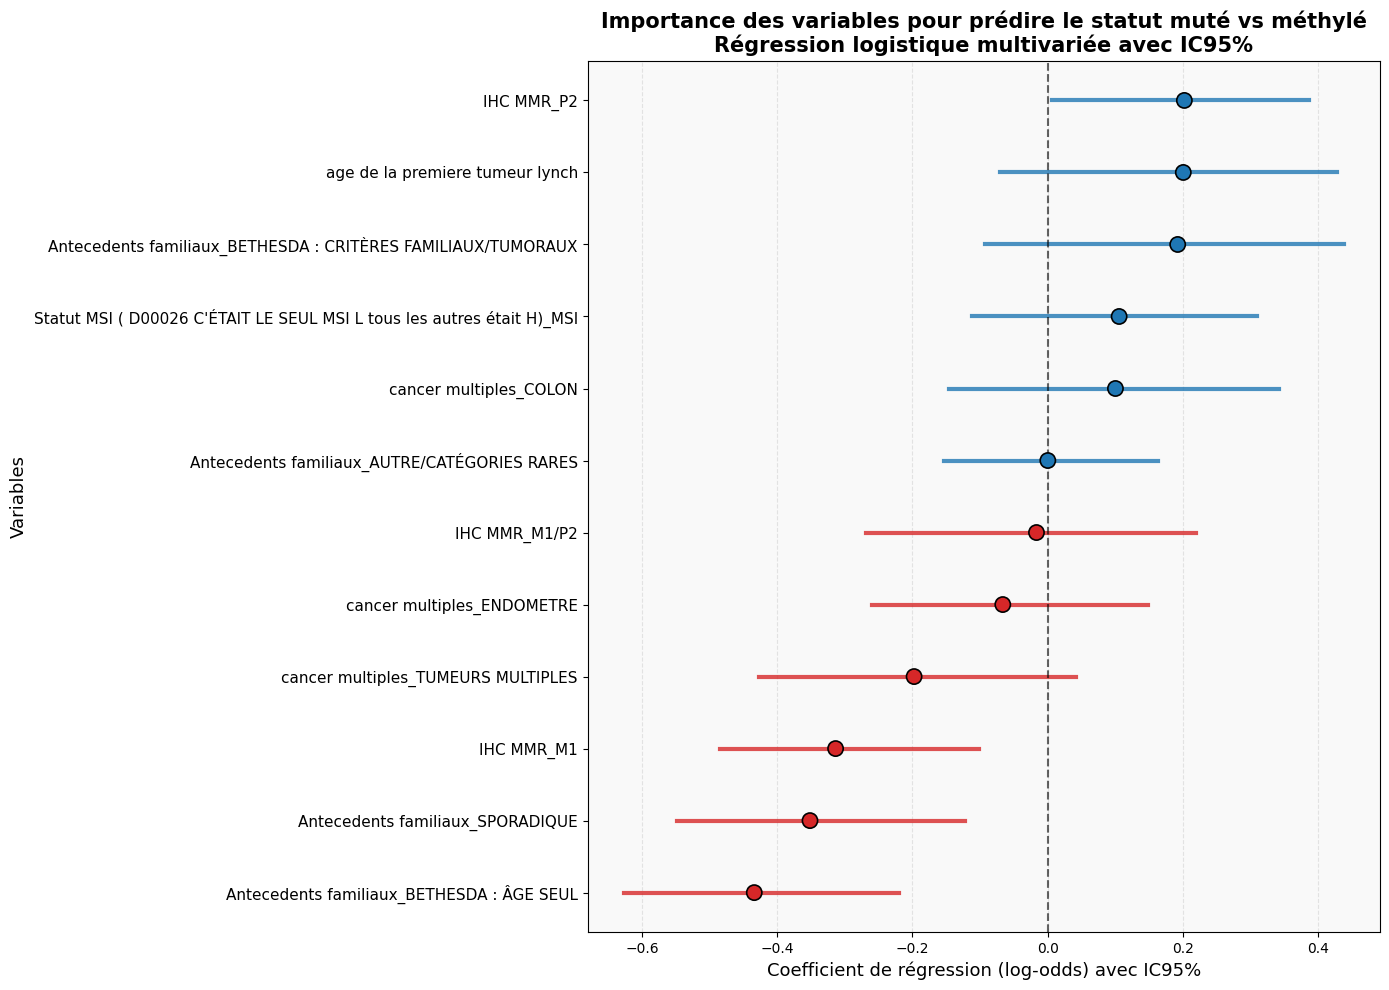


VARIABLES STATISTIQUEMENT SIGNIFICATIVES (p < 0.05)

Antecedents familiaux_BETHESDA : ÂGE SEUL:
  Coefficient: -0.434 (IC95%: -0.627--0.220)
  Odds Ratio: 0.648 (IC95%: 0.534-0.803)
  p-value: 0.0007
  Interprétation: favorise le statut MUTÉ

Antecedents familiaux_SPORADIQUE:
  Coefficient: -0.351 (IC95%: -0.548--0.122)
  Odds Ratio: 0.704 (IC95%: 0.578-0.885)
  p-value: 0.0158
  Interprétation: favorise le statut MUTÉ

IHC MMR_M1:
  Coefficient: -0.314 (IC95%: -0.485--0.102)
  Odds Ratio: 0.731 (IC95%: 0.616-0.903)
  p-value: 0.0081
  Interprétation: favorise le statut MUTÉ

ANALYSE PAR CATÉGORIE DE VARIABLES

ÂGE AU PREMIER CANCER:
  age de la premiere tumeur lynch: OR=1.22 [0.93-1.53] (NS) → favorise METHYLÉ

ANTÉCÉDENTS FAMILIAUX:
  Antecedents familiaux_BETHESDA : ÂGE SEUL: OR=0.65 [0.53-0.80] *** → favorise MUTÉ
  Antecedents familiaux_SPORADIQUE: OR=0.70 [0.58-0.89] *** → favorise MUTÉ
  Antecedents familiaux_BETHESDA : CRITÈRES FAMILIAUX/TUMORAUX: OR=1.21 [0.91-1.55] (NS) → fa

In [ ]:
#version final regression logistic avec regularisation + modalités rare groupé + test stats
# regression logistique - ANALYSE DES COEFFICIENTS COMPLÈTE

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_excel(r"C:\Users\stude\OneDrive\Bureau\these_version_ultime\recueil.xlsx")

# Nettoyer la variable cible
df['target'] = df['muté/methylé'].str.strip().str.lower()
df = df[df['target'].isin(['muté', 'methylé'])].copy()

# Sélectionner les features
features = [
    'age de la premiere tumeur lynch', 
    'Antecedents familiaux', 
    'cancer multiples', 
    'Statut MSI ( D00026 C\'ÉTAIT LE SEUL MSI L tous les autres était H)', 
    'IHC MMR'
]

# Préparer les données
X = df[features].copy()
y = df['target']

# Nettoyage des features
X['age de la premiere tumeur lynch'] = pd.to_numeric(X['age de la premiere tumeur lynch'], errors='coerce')
X = X.dropna(subset=['age de la premiere tumeur lynch'])

# Nettoyer et regrouper les catégories rares
print("=" * 80)
print("NETTOYAGE ET REGROUPEMENT DES CATÉGORIES RARES")
print("=" * 80)

categorical_features = ['Antecedents familiaux', 'cancer multiples', 
                       'Statut MSI ( D00026 C\'ÉTAIT LE SEUL MSI L tous les autres était H)', 
                       'IHC MMR']
numeric_features = ['age de la premiere tumeur lynch']

for col in categorical_features:
    X[col] = X[col].astype(str).str.strip().str.upper()
    X[col] = X[col].replace(['NAN', 'NR', 'N/R', 'N R', 'NON RENSEIGNE', 'NON FAIT', 'NA', 'N/A', ''], 'MANQUANT')
    
    # Regroupement des catégories avec moins de 5 observations
    counts = X[col].value_counts()
    rare_categories = counts[counts < 5].index
    if len(rare_categories) > 0:
        print(f"{col}: {len(rare_categories)} catégories rares regroupées")
        X[col] = X[col].replace(rare_categories, 'AUTRE/CATÉGORIES RARES')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_features)
    ])

# Appliquer le preprocessing sur TOUTES les données
X_processed = preprocessor.fit_transform(X)
y_processed = y[X.index]

# Obtenir les noms des features après one-hot encoding
feature_names = (numeric_features + 
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

print(f"\nDonnées finales: {X_processed.shape[0]} observations, {X_processed.shape[1]} variables")
print(f"Répartition des classes: {pd.Series(y_processed).value_counts().to_dict()}")

# Entraîner la régression logistique avec régularisation
model = LogisticRegression(random_state=42, max_iter=1000, 
                          class_weight='balanced', penalty='l2', C=0.1)
model.fit(X_processed, y_processed)

# Tests de significativité
f_values, p_values = f_classif(X_processed, y_processed)

# Bootstrap pour intervalles de confiance (1000 itérations)
print("\nCalcul des intervalles de confiance par bootstrap...")
n_bootstraps = 1000
boot_coefs = []
boot_odds = []

for i in range(n_bootstraps):
    if i % 200 == 0:
        print(f"  Bootstrap {i}/{n_bootstraps}")
    X_boot, y_boot = resample(X_processed, y_processed, random_state=i)
    model_boot = LogisticRegression(random_state=42, max_iter=1000, 
                                   class_weight='balanced', penalty='l2', C=0.1)
    model_boot.fit(X_boot, y_boot)
    boot_coefs.append(model_boot.coef_[0])
    boot_odds.append(np.exp(model_boot.coef_[0]))

boot_coefs = np.array(boot_coefs)
boot_odds = np.array(boot_odds)

# Calcul des intervalles de confiance
ci_lower_coef = np.percentile(boot_coefs, 2.5, axis=0)
ci_upper_coef = np.percentile(boot_coefs, 97.5, axis=0)
ci_lower_or = np.percentile(boot_odds, 2.5, axis=0)
ci_upper_or = np.percentile(boot_odds, 97.5, axis=0)

# Création du tableau d'analyse complet
feature_analysis = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.coef_[0],
    'odds_ratio': np.exp(model.coef_[0]),
    'ci_lower_coef': ci_lower_coef,
    'ci_upper_coef': ci_upper_coef,
    'ci_lower_or': ci_lower_or,
    'ci_upper_or': ci_upper_or,
    'p_value': p_values,
    'significant': p_values < 0.05,
    'abs_coefficient': np.abs(model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

# AFFICHAGE DES RÉSULTATS PRINCIPAUX
print("=" * 100)
print("ANALYSE DES COEFFICIENTS - RÉGRESSION LOGISTIQUE")
print("=" * 100)
print(f"Nombre d'observations: {len(X_processed)}")
print(f"Répartition des classes: {pd.Series(y_processed).value_counts().to_dict()}")
print(f"Paramètres: régularisation L2, C=0.1")

print("\n" + "=" * 100)
print("TOP 15 DES VARIABLES LES PLUS IMPORTANTES")
print("=" * 100)

for i, row in feature_analysis.head(15).iterrows():
    direction = "↑ METHYLÉ" if row['coefficient'] > 0 else "↓ MUTÉ"
    significance = "***" if row['significant'] else "NS"
    
    print(f"{row['feature']:55} | "
          f"Coef: {row['coefficient']:7.3f} [{row['ci_lower_coef']:5.3f}-{row['ci_upper_coef']:5.3f}] | "
          f"OR: {row['odds_ratio']:6.3f} [{row['ci_lower_or']:4.3f}-{row['ci_upper_or']:4.3f}] | "
          f"{direction} {significance}")

# VISUALISATION DES COEFFICIENTS
import matplotlib.pyplot as plt
import numpy as np

# Tri des 15 variables les plus importantes
top_features = feature_analysis.head(15).sort_values('coefficient', ascending=True)
y_pos = np.arange(len(top_features))

# Définir les couleurs selon le signe du coefficient
colors = np.where(top_features['coefficient'] < 0, '#d62728', '#1f77b4')  # rouge / bleu

plt.figure(figsize=(14, 10))

# Bandes d'intervalles de confiance colorées
for i, (coef, low, up, color) in enumerate(zip(
    top_features['coefficient'],
    top_features['ci_lower_coef'],
    top_features['ci_upper_coef'],
    colors
)):
    plt.plot([low, up], [i, i], color=color, linewidth=3, alpha=0.8)

# Points centraux colorés avec bordures
plt.scatter(
    top_features['coefficient'], y_pos, 
    c=colors, s=120, edgecolors='black', linewidth=1.2, zorder=3
)

# Ligne verticale à zéro
plt.axvline(x=0, color='black', linestyle='--', alpha=0.6)

# Paramètres des axes
plt.yticks(y_pos, top_features['feature'], fontsize=11)
plt.xlabel('Coefficient de régression (log-odds) avec IC95%', fontsize=13)
plt.ylabel('Variables', fontsize=13)
plt.title(
    'Importance des variables pour prédire le statut muté vs méthylé\n'
    'Régression logistique multivariée avec IC95%',
    fontsize=15, weight='bold'
)

# Grille plus douce
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Fond légèrement grisé pour lisibilité
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()


# ANALYSE DES VARIABLES SIGNIFICATIVES
print("\n" + "=" * 100)
print("VARIABLES STATISTIQUEMENT SIGNIFICATIVES (p < 0.05)")
print("=" * 100)

significant_vars = feature_analysis[feature_analysis['significant']]
if len(significant_vars) > 0:
    for _, row in significant_vars.iterrows():
        direction = "favorise le statut METHYLÉ" if row['coefficient'] > 0 else "favorise le statut MUTÉ"
        print(f"\n\033[1m{row['feature']}\033[0m:")
        print(f"  Coefficient: {row['coefficient']:.3f} (IC95%: {row['ci_lower_coef']:.3f}-{row['ci_upper_coef']:.3f})")
        print(f"  Odds Ratio: {row['odds_ratio']:.3f} (IC95%: {row['ci_lower_or']:.3f}-{row['ci_upper_or']:.3f})")
        print(f"  p-value: {row['p_value']:.4f}")
        print(f"  Interprétation: {direction}")
else:
    print("Aucune variable n'est statistiquement significative au seuil de 5%")

# ANALYSE PAR CATÉGORIE DE VARIABLES
print("\n" + "=" * 100)
print("ANALYSE PAR CATÉGORIE DE VARIABLES")
print("=" * 100)

categories = {
    'ÂGE AU PREMIER CANCER': [f for f in feature_names if 'age' in f.lower()],
    'ANTÉCÉDENTS FAMILIAUX': [f for f in feature_names if any(x in f.lower() for x in ['antecedent', 'familiaux'])],
    'CANCERS MULTIPLES': [f for f in feature_names if 'cancer multiples' in f.lower()],
    'STATUT MSI': [f for f in feature_names if 'statut msi' in f.lower()],
    'IHC MMR': [f for f in feature_names if 'ihc mmr' in f.lower()]
}

for category, features_in_category in categories.items():
    cat_df = feature_analysis[feature_analysis['feature'].isin(features_in_category)]
    if not cat_df.empty:
        print(f"\n\033[1m{category}:\033[0m")
        for _, row in cat_df.iterrows():
            direction = "favorise METHYLÉ" if row['coefficient'] > 0 else "favorise MUTÉ"
            sig = "***" if row['significant'] else "(NS)"
            print(f"  {row['feature']}: OR={row['odds_ratio']:.2f} [{row['ci_lower_or']:.2f}-{row['ci_upper_or']:.2f}] {sig} → {direction}")

# STATISTIQUES DESCRIPTIVES
print("\n" + "=" * 100)
print("STATISTIQUES DESCRIPTIVES PAR GROUPE")
print("=" * 100)

print("\nÂge moyen au premier cancer Lynch:")
age_stats = df.groupby('target')['age de la premiere tumeur lynch'].agg(['mean', 'std', 'count'])
print(age_stats)

print("\nDistribution des antécédents familiaux:")
print(pd.crosstab(df['Antecedents familiaux'], df['target'], margins=True))

print("\nDistribution des cancers multiples:")
print(pd.crosstab(df['cancer multiples'], df['target'], margins=True))

print("\n" + "=" * 100)
print("RÉSUMÉ DES RÉSULTATS CLÉS")
print("=" * 100)

# Résumé des principales conclusions
print("\n\033[1mPRINCIPALES CONCLUSIONS:\033[0m")
print(f"- Nombre total de patients analysés: {len(X_processed)}")
print(f"- Variables analysées: {len(feature_names)}")
print(f"- Variables significatives (p<0.05): {len(significant_vars)}")

if len(significant_vars) > 0:
    print("\n\033[1mVariables les plus prédictives:\033[0m")
    for i, row in significant_vars.head(5).iterrows():
        effect = "augmente" if row['odds_ratio'] > 1 else "réduit"
        magnitude = f"{abs(row['odds_ratio']-1):.1f}x" if row['odds_ratio'] != 1 else "aucun effet"
        print(f"  • {row['feature']}: {effect} le odds de méthylation de {magnitude}")

print("\nAnalyse terminée! ✅")

                     Antecedents familiaux   cancer multiples  \
0                             AMSTERDAM II              COLON   
1   BETHESDA : CRITERES FAMILIAUX/TUMORAUX              COLON   
2                             AMSTERDAM II              COLON   
3                             AMSTERDAM II  TUMEURS MULTIPLES   
4   BETHESDA : CRITERES FAMILIAUX/TUMORAUX          ENDOMETRE   
..                                     ...                ...   
73                     BETHESDA : AGE SEUL              COLON   
74                     BETHESDA : AGE SEUL              COLON   
75                     BETHESDA : AGE SEUL              COLON   
76  BETHESDA : CRITERES FAMILIAUX/TUMORAUX  TUMEURS MULTIPLES   
77  BETHESDA : CRITERES FAMILIAUX/TUMORAUX  TUMEURS MULTIPLES   

   Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)  \
0                                                 MSI                   
1                                                 MSI                   


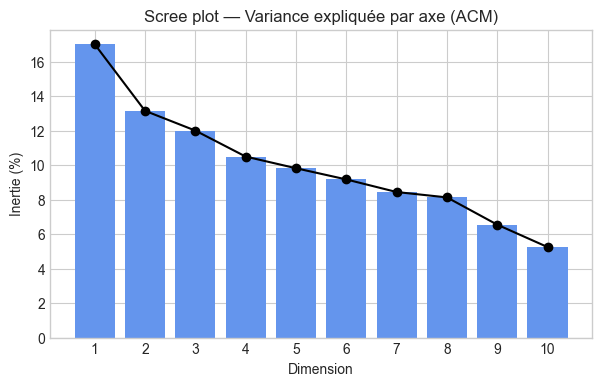

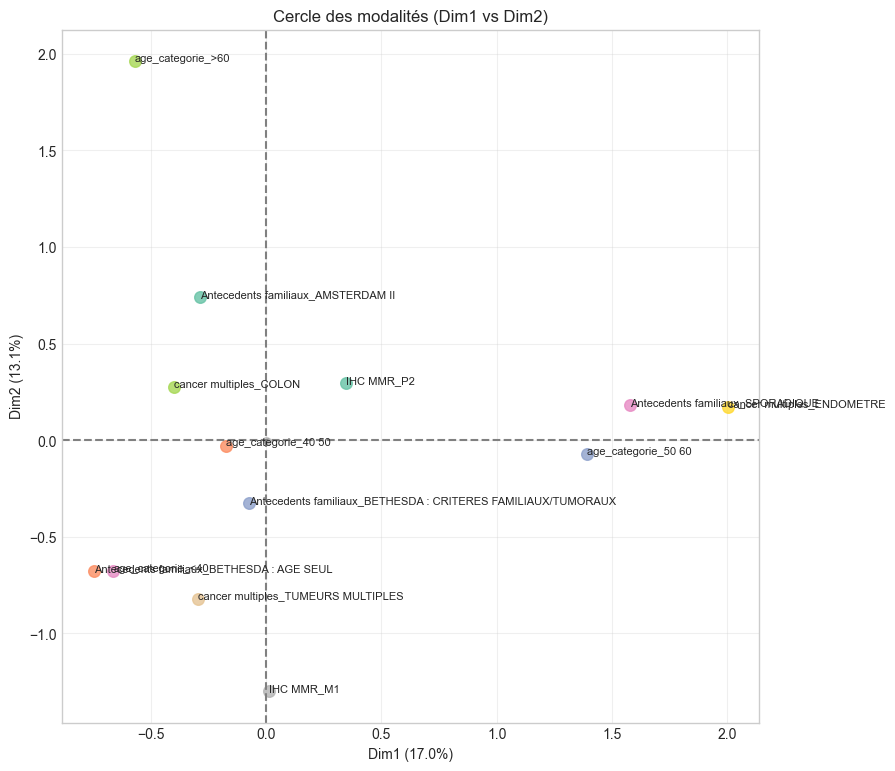

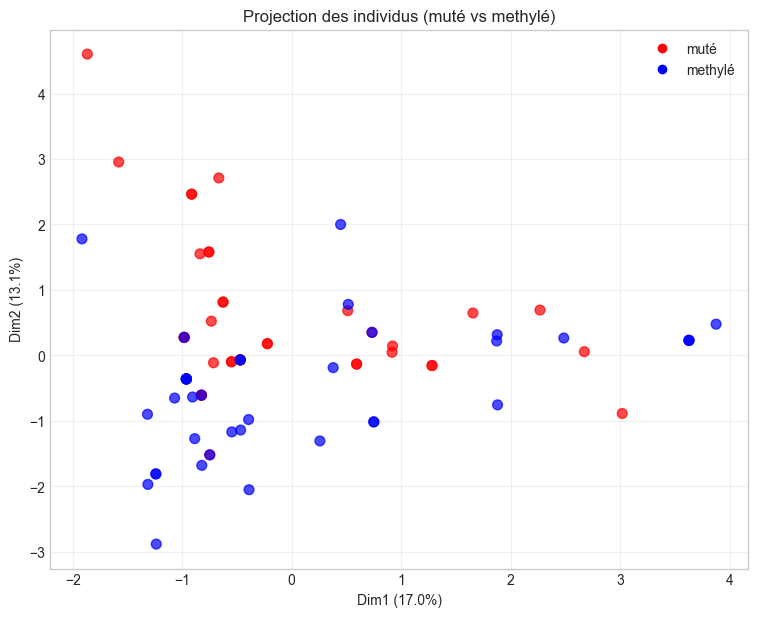

In [ ]:
#ACM FINALE reussi car suppression des NR faites ! que avec methylé et muté ( pas les secondaires )

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

INPUT_PATH = r"C:\\Users\\stude\\OneDrive\\Bureau\\these_version_ultime\\recueil.xlsx"
ACM_FEATURES = [
    'age de la premiere tumeur lynch',
    'Antecedents familiaux',
    'cancer multiples',
    "Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)",
    'IHC MMR'
]
MIN_FREQ_FOR_RARE = 4             # seuil minimum pour considérer modalité "rare"
PRESERVE_MODALITIES = ['AMSTERDAM II', 'AMSTERDAM']  # modalités à préserver
MAX_CLUSTERS = 6
N_SVD_COMPONENTS = 10
FORCE_K = None

# ---------- CHARGEMENT & NETTOYAGE ----------
df = pd.read_excel(INPUT_PATH).copy()

# Gestion de la target si existante
if 'muté/methylé' in df.columns:
    df['target'] = df['muté/methylé'].astype(str).str.strip().str.lower()
    df = df[df['target'].isin(['muté', 'methylé'])].copy()
else:
    df['target'] = np.nan

ACM_FEATURES = [c for c in ACM_FEATURES if c in df.columns]
if not ACM_FEATURES:
    raise ValueError("Aucune des colonnes ACM_FEATURES n'existe dans le fichier.")

acm_df = df[ACM_FEATURES + ['target']].copy()

# Age en catégories
if 'age de la premiere tumeur lynch' in acm_df.columns:
    acm_df['age_num'] = pd.to_numeric(acm_df['age de la premiere tumeur lynch'], errors='coerce')
    acm_df = acm_df.dropna(subset=['age_num'])
    acm_df['age_categorie'] = pd.cut(acm_df['age_num'], bins=[0,40,50,60,120],
                                     labels=['<40','40-50','50-60','>60'])
else:
    acm_df['age_categorie'] = 'INCONNU'

categorical_cols = [c for c in ACM_FEATURES if c != 'age de la premiere tumeur lynch'] + ['age_categorie']

import unicodedata

def normalize_str(s):
    if pd.isna(s):
        return s
    s = str(s).strip().upper()
    s = unicodedata.normalize('NFKD', s).encode('ASCII','ignore').decode('ASCII')  # enlever accents
    s = s.replace('_', ' ').replace('-', ' ')
    s = ' '.join(s.split())  # supprimer espaces multiples
    return s

# Supprimer directement sans liste complexe
for col in categorical_cols:
    acm_df[col] = acm_df[col].apply(normalize_str)
    acm_df[col] = acm_df[col].replace({
        'NAN':np.nan, 'NONE':np.nan, 'NA':np.nan, 
        'N/A':np.nan, 'N R':np.nan, 'N/R':np.nan, 'NR':np.nan,
        "STATUT MSI ( D00026 C'ÉTAIT LE SEUL MSI L TOUS LES AUTRES ÉTAIT H)": np.nan,
        "IHC MMR AUTRE": np.nan,
        "ANTECEDENTS FAMILIAUX NR": np.nan
    })

acm_df = acm_df.dropna(subset=categorical_cols).reset_index(drop=True)

print(acm_df[categorical_cols])

# ---------- REGROUPEMENT MODALITÉS RARES ----------
for col in categorical_cols:
    counts = acm_df[col].value_counts()
    rare = counts[counts < MIN_FREQ_FOR_RARE].index.tolist()
    rare = [r for r in rare if r not in PRESERVE_MODALITIES]
    if rare:
        acm_df[col] = acm_df[col].replace(rare, 'AUTRE')
    print(f"{col}: modalités finales = {acm_df[col].nunique()}")

# ---------- ENCODAGE INDICATRICE ----------
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
D = encoder.fit_transform(acm_df[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
D = np.asarray(D, dtype=float)
n, K = D.shape
print(f"Matrice indicatrice: n={n}, K={K}")

# ---------- MCA par SVD ----------
P = D / n
c = P.sum(axis=0)
r = np.repeat(1/n, n)
expected = np.outer(r, c)
S = (P - expected) / np.sqrt(expected)
S = np.nan_to_num(S, nan=0.0, posinf=0.0, neginf=0.0)

ncomp = min(N_SVD_COMPONENTS, min(n-1, K-1))
U, s, VT = np.linalg.svd(S, full_matrices=False)
U, s, VT = U[:, :ncomp], s[:ncomp], VT[:ncomp, :]

eigvals = s**2
explained = eigvals / eigvals.sum() * 100
row_coords = (U * s) / np.sqrt(r)[:, None]
col_coords = (VT.T * s) / np.sqrt(c)[:, None]

row_cos2 = (row_coords**2) / (row_coords**2).sum(axis=1, keepdims=True)
col_cos2 = (col_coords**2) / (col_coords**2).sum(axis=1, keepdims=True)
contrib = (c[:, None] * col_coords**2) / eigvals[None, :]

# ---------- AFFICHAGES ACM ----------
plt.figure(figsize=(7,4))
dims = np.arange(1, len(explained)+1)
plt.bar(dims, explained, color='cornflowerblue')
plt.plot(dims, explained, 'o-', color='black')
plt.xlabel("Dimension"); plt.ylabel("Inertie (%)")
plt.title("Scree plot — Variance expliquée par axe (ACM)")
plt.xticks(dims); plt.show()

plt.figure(figsize=(9,9))
cos2_threshold = 0.02
for i, name in enumerate(feature_names):
    if "AUTRE" in name:
        continue  # ignorer les modalités rares dans le plot
    x, y = col_coords[i,0], col_coords[i,1]
    if col_cos2[i,0] + col_cos2[i,1] >= cos2_threshold:
        plt.scatter(x, y, s=70, alpha=0.8)
        plt.text(x, y, name, fontsize=8)
    else:
        plt.scatter(x, y, s=20, alpha=0.3, color='gray')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel(f"Dim1 ({explained[0]:.1f}%)"); plt.ylabel(f"Dim2 ({explained[1]:.1f}%)")
plt.title("Cercle des modalités (Dim1 vs Dim2)")
plt.grid(alpha=0.3); plt.show()


# Filtrer uniquement les individus muté ou methylé
individus_plot = acm_df[acm_df['target'].isin(['muté', 'methylé'])].copy()
row_coords_plot = row_coords[individus_plot.index, :]

# Couleur selon target
colors = individus_plot['target'].map({'muté':'red', 'methylé':'blue'})

# Graphique des individus
plt.figure(figsize=(9,7))
plt.scatter(row_coords_plot[:,0], row_coords_plot[:,1], c=colors, alpha=0.7, s=50)
plt.xlabel(f"Dim1 ({explained[0]:.1f}%)")
plt.ylabel(f"Dim2 ({explained[1]:.1f}%)")
plt.title("Projection des individus (muté vs methylé)")

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='muté',
                          markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='methylé',
                          markerfacecolor='blue', markersize=8)]
plt.legend(handles=legend_elements)

plt.grid(alpha=0.3)
plt.show()


Nombre d'individus évalués : 78
Nombre de dimensions ACM utilisées : 2
Mapping target -> labels: {'methylé': 0, 'muté': 1}


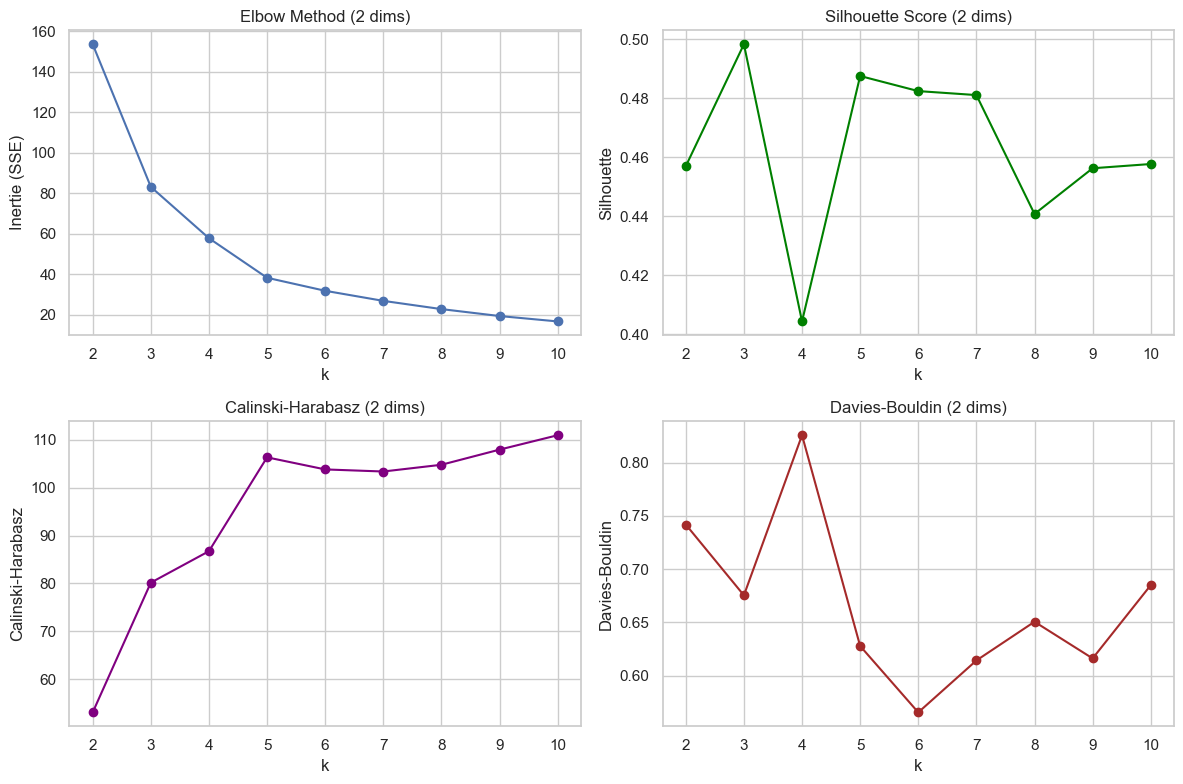

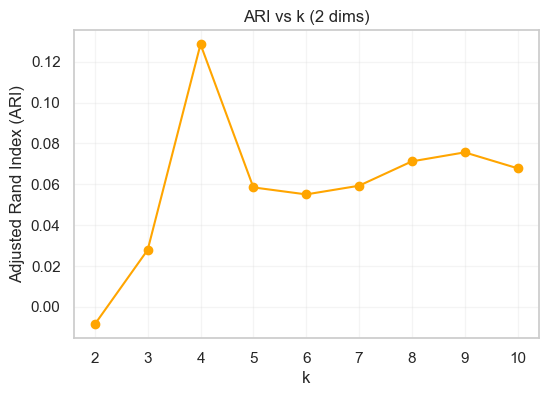

In [ ]:
#test du nombre  de dimensions a utilisé et du nombre de K ( graph par nombre de dimension)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score
)
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# -------- PARAMÈTRES --------
K_MIN, K_MAX = 2, 10        # plage de k à tester
N_DIMS = 2                 # <-- <<< tu changes juste cette variable >>>
RANDOM_STATE = 42

# Vérification que row_coords_plot et individus_plot existent
try:
    X = row_coords_plot[:, :N_DIMS]
    df = individus_plot.copy()
except NameError:
    raise RuntimeError("Définir d'abord `row_coords_plot` et `individus_plot`.")

n = X.shape[0]
print(f"Nombre d'individus évalués : {n}")
print(f"Nombre de dimensions ACM utilisées : {N_DIMS}")

# Conversion target → labels numériques pour ARI (si dispo)
target_labels = None
if 'target' in df.columns and df['target'].notna().any():
    uniques = sorted(df['target'].unique())
    tmap = {v:i for i,v in enumerate(uniques)}
    target_labels = df['target'].map(tmap).values
    print("Mapping target -> labels:", tmap)
else:
    print("Pas de target disponible pour ARI.")

# Stockage des résultats
ks = list(range(K_MIN, K_MAX+1))
inertias, sil_scores, ch_scores, db_scores, ari_scores = [], [], [], [], []

# -------- BOUCLE SUR K --------
for k in ks:
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=20)
    labels = km.fit_predict(X)
    
    # Calcul des métriques
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    ch_scores.append(calinski_harabasz_score(X, labels))
    db_scores.append(davies_bouldin_score(X, labels))
    ari_scores.append(adjusted_rand_score(target_labels, labels) if target_labels is not None else np.nan)

# -------- VISUALISATION DES MÉTRIQUES --------
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(ks, inertias, 'o-')
plt.xlabel('k'); plt.ylabel('Inertie (SSE)')
plt.title(f'Elbow Method ({N_DIMS} dims)')

plt.subplot(2,2,2)
plt.plot(ks, sil_scores, 'o-', color='green')
plt.xlabel('k'); plt.ylabel('Silhouette')
plt.title(f'Silhouette Score ({N_DIMS} dims)')

plt.subplot(2,2,3)
plt.plot(ks, ch_scores, 'o-', color='purple')
plt.xlabel('k'); plt.ylabel('Calinski-Harabasz')
plt.title(f'Calinski-Harabasz ({N_DIMS} dims)')

plt.subplot(2,2,4)
plt.plot(ks, db_scores, 'o-', color='brown')
plt.xlabel('k'); plt.ylabel('Davies-Bouldin')
plt.title(f'Davies-Bouldin ({N_DIMS} dims)')

plt.tight_layout()
plt.show()

# -------- PLOT ARI VS K (SI TARGET PRÉSENTE) --------
if target_labels is not None:
    plt.figure(figsize=(6,4))
    plt.plot(ks, ari_scores, 'o-', color='orange')
    plt.xlabel('k')
    plt.ylabel('Adjusted Rand Index (ARI)')
    plt.title(f'ARI vs k ({N_DIMS} dims)')
    plt.grid(alpha=0.2)
    plt.show()



,n_dims,mode,silhouette,calinski,davies,inertia_sse,cluster_sizes,inertie_cumulee_%,ARI
0,1,std,0.719114,385.473577,0.365607,4.691078,"51,7,15,5",17.008122,-0.007115
1,1,std_downw_0.5,0.719114,385.473577,0.365607,1.172770,"51,7,15,5",17.008122,-0.007115
2,2,std,0.411362,87.040774,0.765150,34.447124,"14,32,10,22",30.155982,0.093897
3,2,std_downw_0.5,0.464467,98.781044,0.685485,19.481933,"10,32,20,16",30.155982,0.080407
4,3,std,0.381413,45.742232,0.860489,81.978274,"12,30,14,22",42.157496,0.021229
5,3,std_downw_0.5,0.387770,49.391673,0.969423,58.453916,"17,9,31,21",42.157496,0.057602
6,4,std,0.277670,24.572932,1.162524,156.296968,"23,29,14,12",52.652967,0.027199
7,4,std_downw_0.5,0.287335,27.831065,1.132992,119.109908,"33,19,19,7",52.652967,0.020469
8,5,std,0.247891,18.911303,1.372139,220.753746,"10,34,8,26",62.472003,0.065211
9,5,std_downw_0.5,0.265029,22.559756,1.248042,173.144600,"12,22,22,22",62.472003,0.068946


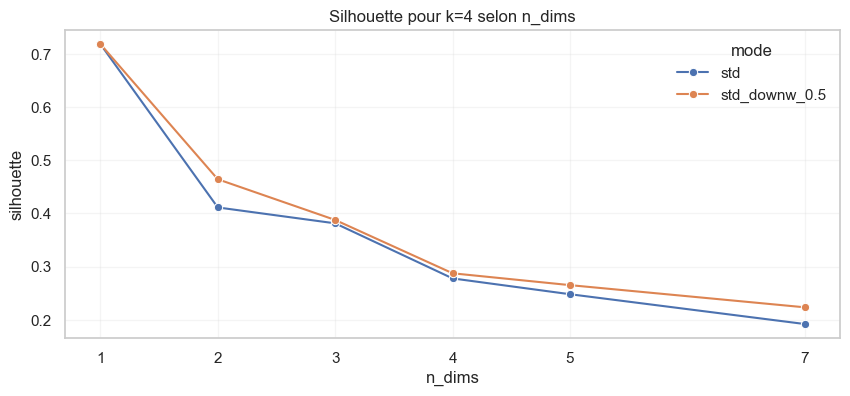

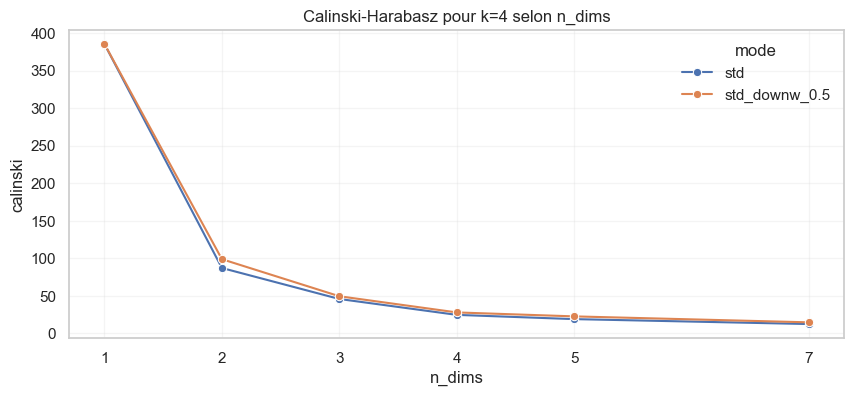


Meilleure config par silhouette :


n_dims                        1
mode                        std
silhouette             0.719114
calinski             385.473577
davies                 0.365607
inertia_sse            4.691078
cluster_sizes         51,7,15,5
inertie_cumulee_%     17.008122
ARI                   -0.007115
Name: 0, dtype: object

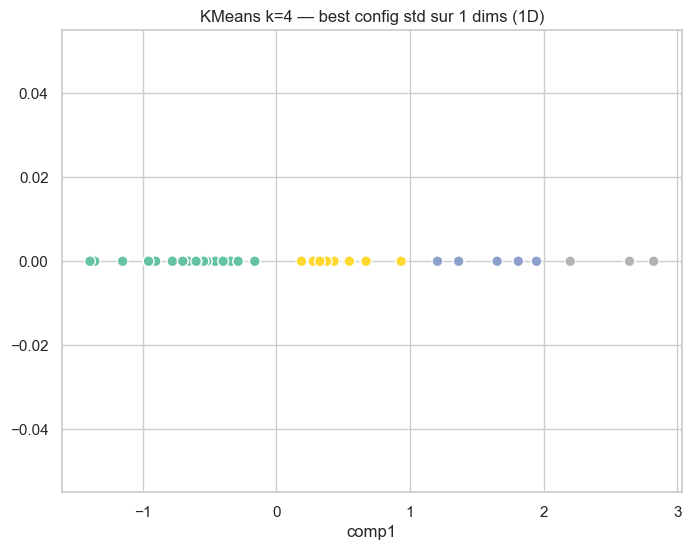

In [ ]:
# test du nombre de dimensions et du nombre de cluster K a utilisé  avec graph generale ( pour toutes les dimensions et les K)
# ---------- ÉVALUATION K=4 SUR DIFFÉRENTS N_DIMS ----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
sns.set_style("whitegrid")

# --- PARAMS (modifie ici) ---
k_fixed = 4
n_dims_list = [1, 2, 3, 4, 5, 7]   # <- choisis les dims que tu veux tester
standardize = True                 # mettre True pour standardiser les composantes (recommandé)
try_downweight_dim1 = True         # True pour tester aussi une version où on diminue le poids de Dim1
dim1_weight = 0.5                  # si try_downweight_dim1 True : poids appliqué sur Dim1 (0..1)

# --- vérifs simples ---
try:
    coords_all = row_coords_plot  # shape (n_indiv, ncomp) tel que défini dans ton ACM
    df = individus_plot.copy()
except NameError:
    raise RuntimeError("Définir d'abord `row_coords_plot` et `individus_plot` dans l'environnement.")

# target -> labels pour ARI (option)
target_labels = None
if 'target' in df.columns and df['target'].notna().any():
    unique_targets = sorted(df['target'].unique())
    tmap = {v:i for i,v in enumerate(unique_targets)}
    target_labels = df['target'].map(tmap).values

results = []

for n_dims in n_dims_list:
    if n_dims > coords_all.shape[1]:
        print(f"Attention: demandé n_dims={n_dims} mais tu n'as que {coords_all.shape[1]} comps. On saute.")
        continue

    # 1) choix des coordonnées
    X = coords_all[:, :n_dims].copy()

    # 2) standardisation optionnelle (par colonne/dimension)
    if standardize:
        X = StandardScaler().fit_transform(X)

    # 3) version « normale » : KMeans sur X
    km = KMeans(n_clusters=k_fixed, random_state=42, n_init=50)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    sizes = np.bincount(labels, minlength=k_fixed)
    inertia = km.inertia_
    inertie_cumulee = explained[:n_dims].sum() if 'explained' in globals() else np.nan

    ari = adjusted_rand_score(target_labels, labels) if target_labels is not None else np.nan

    results.append({
        "n_dims": n_dims,
        "mode": "std",
        "silhouette": sil,
        "calinski": ch,
        "davies": db,
        "inertia_sse": inertia,
        "cluster_sizes": sizes,
        "inertie_cumulee_%": inertie_cumulee,
        "ARI": ari
    })

    # 4) version downweight Dim1 (optionnel)
    if try_downweight_dim1 and n_dims >= 1:
        Xw = X.copy()
        # si standardize True, Dim1 = colonne 0 est déjà standardisée ; on réduit son amplitude
        Xw[:, 0] = Xw[:, 0] * dim1_weight
        kmw = KMeans(n_clusters=k_fixed, random_state=42, n_init=50)
        lbl_w = kmw.fit_predict(Xw)
        sil_w = silhouette_score(Xw, lbl_w)
        ch_w = calinski_harabasz_score(Xw, lbl_w)
        db_w = davies_bouldin_score(Xw, lbl_w)
        sizes_w = np.bincount(lbl_w, minlength=k_fixed)
        ari_w = adjusted_rand_score(target_labels, lbl_w) if target_labels is not None else np.nan

        results.append({
            "n_dims": n_dims,
            "mode": f"std_downw_{dim1_weight}",
            "silhouette": sil_w,
            "calinski": ch_w,
            "davies": db_w,
            "inertia_sse": kmw.inertia_,
            "cluster_sizes": sizes_w,
            "inertie_cumulee_%": inertie_cumulee,
            "ARI": ari_w
        })

# --- résultats ---
df_res = pd.DataFrame(results)
# mettre cluster_sizes en colonne plus lisible
df_res['cluster_sizes'] = df_res['cluster_sizes'].apply(lambda x: ','.join(map(str, x)))
display(df_res.sort_values(['n_dims','mode']))

# --- PLOTS synthèse (silhouette + calinski par n_dims) ---
plt.figure(figsize=(10,4))
sns.lineplot(data=df_res, x='n_dims', y='silhouette', hue='mode', marker='o')
plt.title(f"Silhouette pour k={k_fixed} selon n_dims")
plt.xticks(n_dims_list)
plt.grid(alpha=0.2)
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(data=df_res, x='n_dims', y='calinski', hue='mode', marker='o')
plt.title(f"Calinski-Harabasz pour k={k_fixed} selon n_dims")
plt.xticks(n_dims_list)
plt.grid(alpha=0.2)
plt.show()

# --- Affichage rapide des clusters pour la meilleure ligne silhouette ---
best_row = df_res.loc[df_res['silhouette'].idxmax()]
print("\nMeilleure config par silhouette :")
display(best_row)

# Option : afficher la projection 2D (Dim1 vs Dim2) et colorer selon le cluster
best_n = int(best_row['n_dims'])
best_mode = best_row['mode']
Xbest = coords_all[:, :best_n].copy()
if standardize:
    Xbest = StandardScaler().fit_transform(Xbest)
if best_mode.startswith('std_downw'):
    Xbest[:,0] = Xbest[:,0] * float(best_mode.split('_')[-1])

km_best = KMeans(n_clusters=k_fixed, random_state=42, n_init=50).fit(Xbest)
lbls_best = km_best.labels_

plt.figure(figsize=(8,6))
if best_n >= 2:
    plt.scatter(Xbest[:,0], Xbest[:,1], c=lbls_best, cmap='Set2', s=50, edgecolor='w')
    plt.xlabel("comp1"); plt.ylabel("comp2")
    plt.title(f"KMeans k={k_fixed} — best config {best_mode} sur {best_n} dims")
else:
    # si 1D on projete sur l'axe horizontal
    plt.scatter(Xbest[:,0], np.zeros_like(Xbest[:,0]), c=lbls_best, cmap='Set2', s=60, edgecolor='w')
    plt.xlabel("comp1")
    plt.title(f"KMeans k={k_fixed} — best config {best_mode} sur {best_n} dims (1D)")
plt.show()


KMeans (k=4) sur 2 dims : silhouette=0.404, Calinski-Harabasz=86.7

Centroides des clusters :
       Dim1      Dim2
0  2.503357  0.100305
1 -0.976302  2.368362
2 -0.851808 -1.073408
3 -0.112034  0.100740


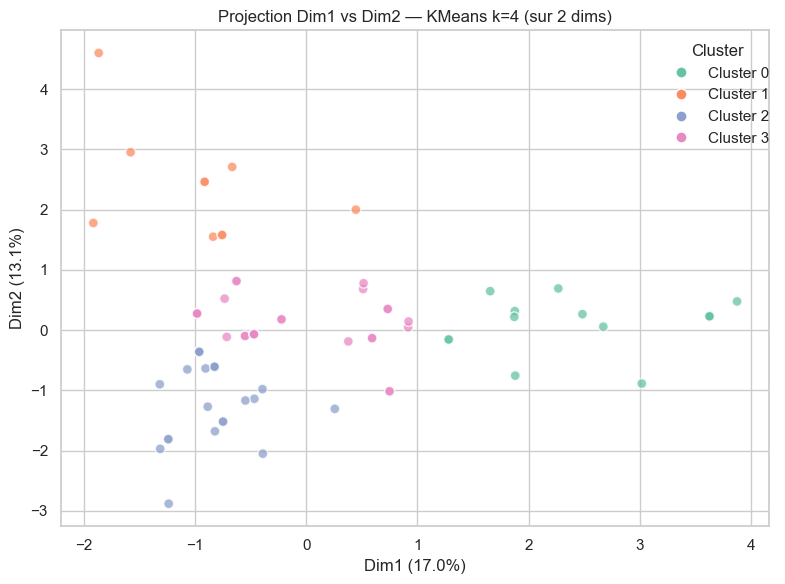

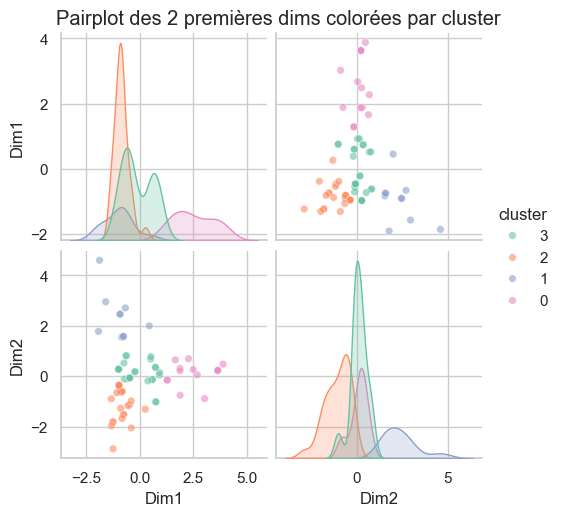


--- Répartition de Antecedents familiaux par cluster ---


Antecedents familiaux,AMSTERDAM II,BETHESDA : AGE SEUL,BETHESDA : CRITERES FAMILIAUX/TUMORAUX,SPORADIQUE
cluster,,,,
0,14.3%,0.0%,21.4%,64.3%
1,60.0%,10.0%,20.0%,10.0%
2,7.7%,53.8%,38.5%,0.0%
3,46.4%,3.6%,39.3%,10.7%



--- Répartition de cancer multiples par cluster ---


cancer multiples,AUTRE,COLON,ENDOMETRE,TUMEURS MULTIPLES
cluster,,,,
0,21.4%,14.3%,64.3%,0.0%
1,0.0%,90.0%,0.0%,10.0%
2,0.0%,57.7%,0.0%,42.3%
3,7.1%,71.4%,0.0%,21.4%



--- Répartition de Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H) par cluster ---


Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H),MSI
cluster,
0,100.0%
1,100.0%
2,100.0%
3,100.0%



--- Répartition de IHC MMR par cluster ---


IHC MMR,AUTRE,M1,M1/P2,P2
cluster,,,,
0,0.0%,14.3%,71.4%,14.3%
1,30.0%,0.0%,60.0%,10.0%
2,0.0%,23.1%,73.1%,3.8%
3,0.0%,0.0%,78.6%,21.4%



--- Répartition de age_categorie par cluster ---


age_categorie,<40,40 50,50 60,>60
cluster,,,,
0,0.0%,28.6%,71.4%,0.0%
1,0.0%,20.0%,0.0%,80.0%
2,53.8%,42.3%,3.8%,0.0%
3,21.4%,57.1%,21.4%,0.0%



Profils synthétiques par cluster :
 cluster  n       Antecedents familiaux  cancer multiples Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)       IHC MMR age_categorie          target
       0 14          SPORADIQUE (64.3%) ENDOMETRE (64.3%)                                                       MSI (100.0%) M1/P2 (71.4%) 50 60 (71.4%) methylé (57.1%)
       1 10        AMSTERDAM II (60.0%)     COLON (90.0%)                                                       MSI (100.0%) M1/P2 (60.0%)   >60 (80.0%)    muté (80.0%)
       2 26 BETHESDA : AGE SEUL (53.8%)     COLON (57.7%)                                                       MSI (100.0%) M1/P2 (73.1%)   <40 (53.8%) methylé (80.8%)
       3 28        AMSTERDAM II (46.4%)     COLON (71.4%)                                                       MSI (100.0%) M1/P2 (78.6%) 40 50 (57.1%)    muté (71.4%)


In [ ]:
# ---------------- KMeans sur les N premières dimensions de l'ACM ----------------  ( après test il vaut mieux 4 clusters avec 2 dimensions les groupes 0 et 2 sont les groupes qui regroupent les caractéristiques methylé et le groupe  3 est a a frontiere car il regroupe les methylé secondairement ( hsitoire familiale) et les cas plus grave tumeurs multiples assez jeune donc methylé secondaire+ muté mais grave jeune et le groupe 1 = muté)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import pandas as pd

# ----------- PARAMÈTRES -----------
n_clusters = 4   # nombre de clusters
n_dims = 2       # <<< ICI tu choisis facilement le nombre de dimensions à utiliser

# ----------- SÉLECTION DES COORDONNÉES -----------
# On garde uniquement les n_dims premières dimensions de l'ACM
coords = row_coords_plot[:, :n_dims]

# ----------- KMEANS -----------
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50)
clusters = kmeans.fit_predict(coords)

# Affecter les clusters au DataFrame
individus_plot = individus_plot.copy()
individus_plot['cluster'] = clusters.astype(int)

# ----------- DIAGNOSTICS NUMÉRIQUES -----------
sil = silhouette_score(coords, clusters)
ch = calinski_harabasz_score(coords, clusters)
print(f"KMeans (k={n_clusters}) sur {n_dims} dims : silhouette={sil:.3f}, Calinski-Harabasz={ch:.1f}")

# Centroides
centroids_df = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=[f"Dim{i+1}" for i in range(n_dims)]
)
print("\nCentroides des clusters :")
print(centroids_df)

# ----------- VISUALISATIONS -----------
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", n_clusters)

# A) Projection sur Dim1 vs Dim2
plt.figure(figsize=(8,6))
colors = [palette[int(c)] for c in individus_plot['cluster']]
plt.scatter(coords[:,0], coords[:,1], c=colors, alpha=0.75, s=50, edgecolor='w')
plt.xlabel(f"Dim1 ({explained[0]:.1f}%)")
plt.ylabel(f"Dim2 ({explained[1]:.1f}%)")
plt.title(f"Projection Dim1 vs Dim2 — KMeans k={n_clusters} (sur {n_dims} dims)")
legend_elements = [
    Line2D([0],[0], marker='o', color='w', label=f'Cluster {i}',
           markerfacecolor=palette[i], markersize=8)
    for i in range(n_clusters)
]
plt.legend(handles=legend_elements, title='Cluster', bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()

# B) Pairplot des n_dims dimensions (si tu en gardes beaucoup, ça peut être lourd)
if n_dims >= 2:
    df_pair = pd.DataFrame(coords, columns=[f"Dim{i+1}" for i in range(n_dims)])
    df_pair['cluster'] = individus_plot['cluster'].astype(str).values
    sns.pairplot(df_pair, hue='cluster', palette="Set2", 
                 plot_kws={'alpha':0.6, 's':30}, corner=False)
    plt.suptitle(f"Pairplot des {n_dims} premières dims colorées par cluster", y=1.02)
    plt.show()

# ----------- PROFILAGE DES CLUSTERS -----------
for col in categorical_cols:
    print(f"\n--- Répartition de {col} par cluster ---")
    tab = pd.crosstab(individus_plot['cluster'], individus_plot[col], normalize='index') * 100
    display(tab.round(1).fillna(0).astype(str) + '%')

# Synthèse des profils par cluster
profiles = []
for c in sorted(individus_plot['cluster'].unique()):
    sub = individus_plot[individus_plot['cluster'] == c]
    profile = {'cluster': c, 'n': len(sub)}
    for var in categorical_cols + ['target']:
        mode = sub[var].mode()
        if len(mode) > 0:
            profile[var] = f"{mode.iloc[0]} ({(sub[var]==mode.iloc[0]).mean()*100:.1f}%)"
    profiles.append(profile)

profiles_df = pd.DataFrame(profiles).sort_values('cluster')
print("\nProfils synthétiques par cluster :")
print(profiles_df.to_string(index=False))



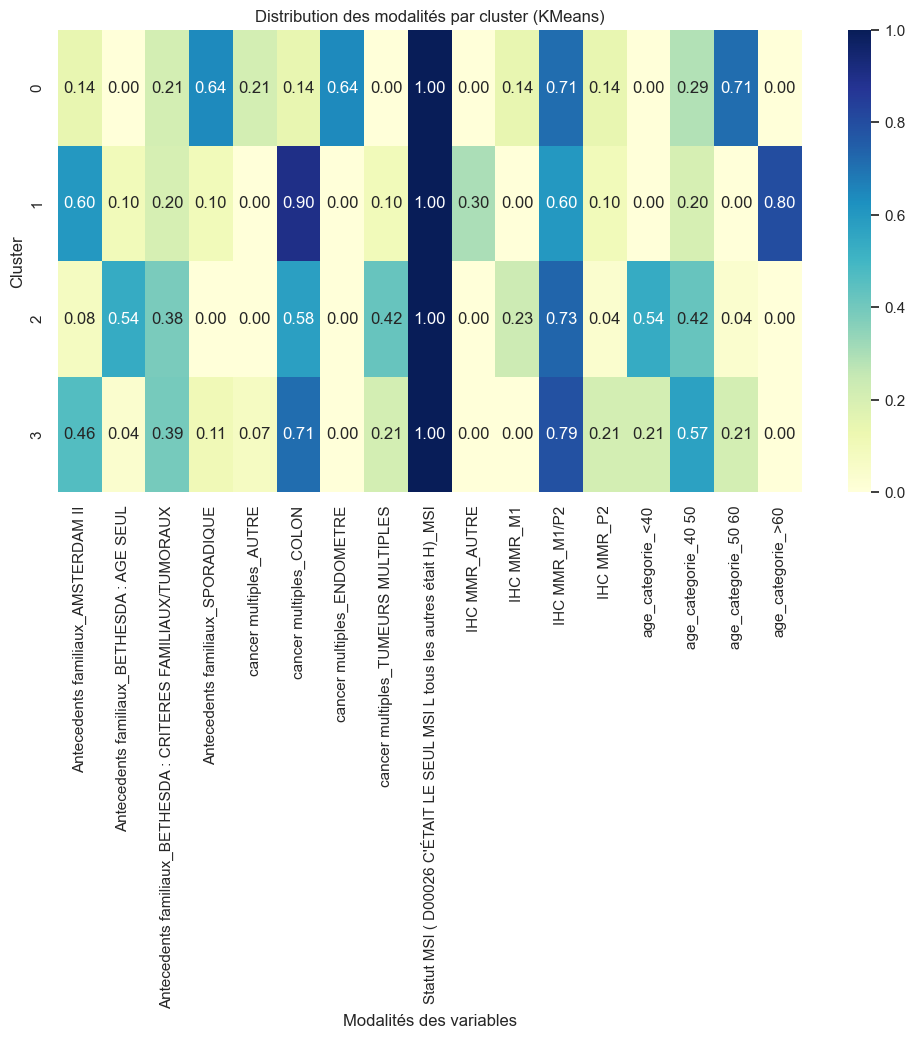

cluster
3    28
2    26
0    14
1    10
Name: count, dtype: int64


In [ ]:
#analyse des clusters par heatmap
import seaborn as sns

# ---------- CALCUL DES DISTRIBUTIONS DES MODALITÉS PAR CLUSTER ----------
cluster_modalities = []

for col in categorical_cols:
    counts = individus_plot.groupby('cluster')[col].value_counts(normalize=True).unstack(fill_value=0)
    counts.columns = [f"{col}_{str(c)}" for c in counts.columns]
    cluster_modalities.append(counts)

# Concaténer toutes les variables en un seul DataFrame pour le heatmap
heatmap_df = pd.concat(cluster_modalities, axis=1)
heatmap_df = heatmap_df.sort_index()  # optionnel, pour trier les clusters

# ---------- HEATMAP ----------
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Distribution des modalités par cluster (KMeans)")
plt.ylabel("Cluster")
plt.xlabel("Modalités des variables")
plt.show()

print(individus_plot['cluster'].value_counts())


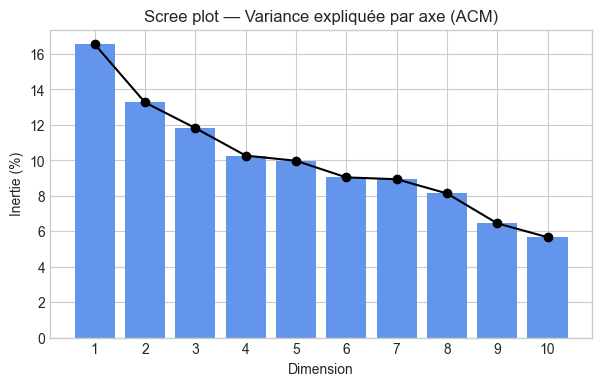

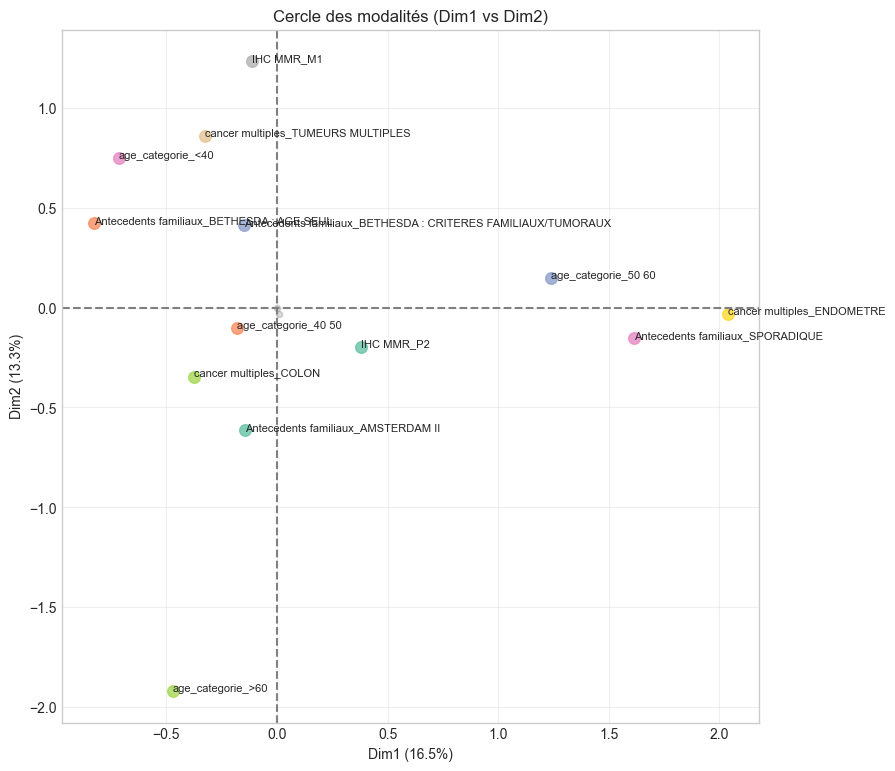

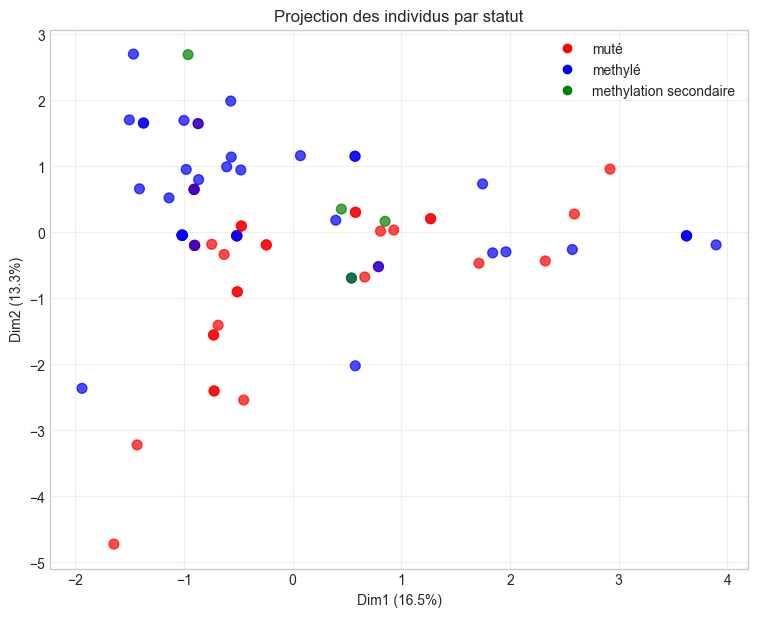

In [ ]:
#ACM avec les 3 labels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore')

# ---------- CONFIG ----------
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

INPUT_PATH = r"C:\\Users\\stude\\OneDrive\\Bureau\\these_version_ultime\\recueil.xlsx"
ACM_FEATURES = [
    'age de la premiere tumeur lynch',
    'Antecedents familiaux',
    'cancer multiples',
    "Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)",
    'IHC MMR'
]
MIN_FREQ_FOR_RARE = 4
PRESERVE_MODALITIES = ['AMSTERDAM II', 'AMSTERDAM']
N_SVD_COMPONENTS = 10

# ---------- CHARGEMENT & NETTOYAGE ----------
df = pd.read_excel(INPUT_PATH).copy()

# Gestion de la target si existante
if 'muté/methylé' in df.columns:
    df['target'] = df['muté/methylé'].astype(str).str.strip().str.lower()
    # inclure les trois catégories
    df = df[df['target'].isin(['muté', 'methylé', 'methylation secondaire'])].copy()
else:
    df['target'] = np.nan

ACM_FEATURES = [c for c in ACM_FEATURES if c in df.columns]
acm_df = df[ACM_FEATURES + ['target']].copy()

# Age en catégories
if 'age de la premiere tumeur lynch' in acm_df.columns:
    acm_df['age_num'] = pd.to_numeric(acm_df['age de la premiere tumeur lynch'], errors='coerce')
    acm_df = acm_df.dropna(subset=['age_num'])
    acm_df['age_categorie'] = pd.cut(acm_df['age_num'], bins=[0,40,50,60,120],
                                     labels=['<40','40-50','50-60','>60'])
else:
    acm_df['age_categorie'] = 'INCONNU'

categorical_cols = [c for c in ACM_FEATURES if c != 'age de la premiere tumeur lynch'] + ['age_categorie']

import unicodedata

def normalize_str(s):
    if pd.isna(s):
        return s
    s = str(s).strip().upper()
    s = unicodedata.normalize('NFKD', s).encode('ASCII','ignore').decode('ASCII')
    s = s.replace('_', ' ').replace('-', ' ')
    s = ' '.join(s.split())
    return s

for col in categorical_cols:
    acm_df[col] = acm_df[col].apply(normalize_str)
    acm_df[col] = acm_df[col].replace({
        'NAN':np.nan, 'NONE':np.nan, 'NA':np.nan, 
        'N/A':np.nan, 'N R':np.nan, 'N/R':np.nan, 'NR':np.nan,
        "STATUT MSI ( D00026 C'ÉTAIT LE SEUL MSI L TOUS LES AUTRES ÉTAIT H)": np.nan,
        "IHC MMR AUTRE": np.nan,
        "ANTECEDENTS FAMILIAUX NR": np.nan
    })

acm_df = acm_df.dropna(subset=categorical_cols).reset_index(drop=True)

# ---------- REGROUPEMENT MODALITÉS RARES ----------
for col in categorical_cols:
    counts = acm_df[col].value_counts()
    rare = counts[counts < MIN_FREQ_FOR_RARE].index.tolist()
    rare = [r for r in rare if r not in PRESERVE_MODALITIES]
    if rare:
        acm_df[col] = acm_df[col].replace(rare, 'AUTRE')

# ---------- ENCODAGE INDICATRICE ----------
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
D = encoder.fit_transform(acm_df[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
D = np.asarray(D, dtype=float)
n, K = D.shape

# ---------- MCA par SVD ----------
P = D / n
c = P.sum(axis=0)
r = np.repeat(1/n, n)
expected = np.outer(r, c)
S = (P - expected) / np.sqrt(expected)
S = np.nan_to_num(S, nan=0.0, posinf=0.0, neginf=0.0)

ncomp = min(N_SVD_COMPONENTS, min(n-1, K-1))
U, s, VT = np.linalg.svd(S, full_matrices=False)
U, s, VT = U[:, :ncomp], s[:ncomp], VT[:ncomp, :]

eigvals = s**2
explained = eigvals / eigvals.sum() * 100
row_coords = (U * s) / np.sqrt(r)[:, None]
col_coords = (VT.T * s) / np.sqrt(c)[:, None]

row_cos2 = (row_coords**2) / (row_coords**2).sum(axis=1, keepdims=True)
col_cos2 = (col_coords**2) / (col_coords**2).sum(axis=1, keepdims=True)

# ---------- AFFICHAGES ACM ----------
plt.figure(figsize=(7,4))
dims = np.arange(1, len(explained)+1)
plt.bar(dims, explained, color='cornflowerblue')
plt.plot(dims, explained, 'o-', color='black')
plt.xlabel("Dimension"); plt.ylabel("Inertie (%)")
plt.title("Scree plot — Variance expliquée par axe (ACM)")
plt.xticks(dims); plt.show()

plt.figure(figsize=(9,9))
cos2_threshold = 0.02
for i, name in enumerate(feature_names):
    if "AUTRE" in name:
        continue
    x, y = col_coords[i,0], col_coords[i,1]
    if col_cos2[i,0] + col_cos2[i,1] >= cos2_threshold:
        plt.scatter(x, y, s=70, alpha=0.8)
        plt.text(x, y, name, fontsize=8)
    else:
        plt.scatter(x, y, s=20, alpha=0.3, color='gray')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel(f"Dim1 ({explained[0]:.1f}%)"); plt.ylabel(f"Dim2 ({explained[1]:.1f}%)")
plt.title("Cercle des modalités (Dim1 vs Dim2)")
plt.grid(alpha=0.3); plt.show()

# ---------- AFFICHAGE INDIVIDUS (3 CATEGORIES) ----------
individus_plot = acm_df[acm_df['target'].isin(['muté', 'methylé', 'methylation secondaire'])].copy()
row_coords_plot = row_coords[individus_plot.index, :]

color_map = {'muté':'red', 'methylé':'blue', 'methylation secondaire':'green'}
colors = individus_plot['target'].map(color_map)

plt.figure(figsize=(9,7))
plt.scatter(row_coords_plot[:,0], row_coords_plot[:,1], c=colors, alpha=0.7, s=50)
plt.xlabel(f"Dim1 ({explained[0]:.1f}%)")
plt.ylabel(f"Dim2 ({explained[1]:.1f}%)")
plt.title("Projection des individus par statut")

legend_elements = [Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=color_map[key], markersize=8)
                   for key in color_map]
plt.legend(handles=legend_elements)
plt.grid(alpha=0.3)
plt.show()


<Figure size 1200x1000 with 0 Axes>

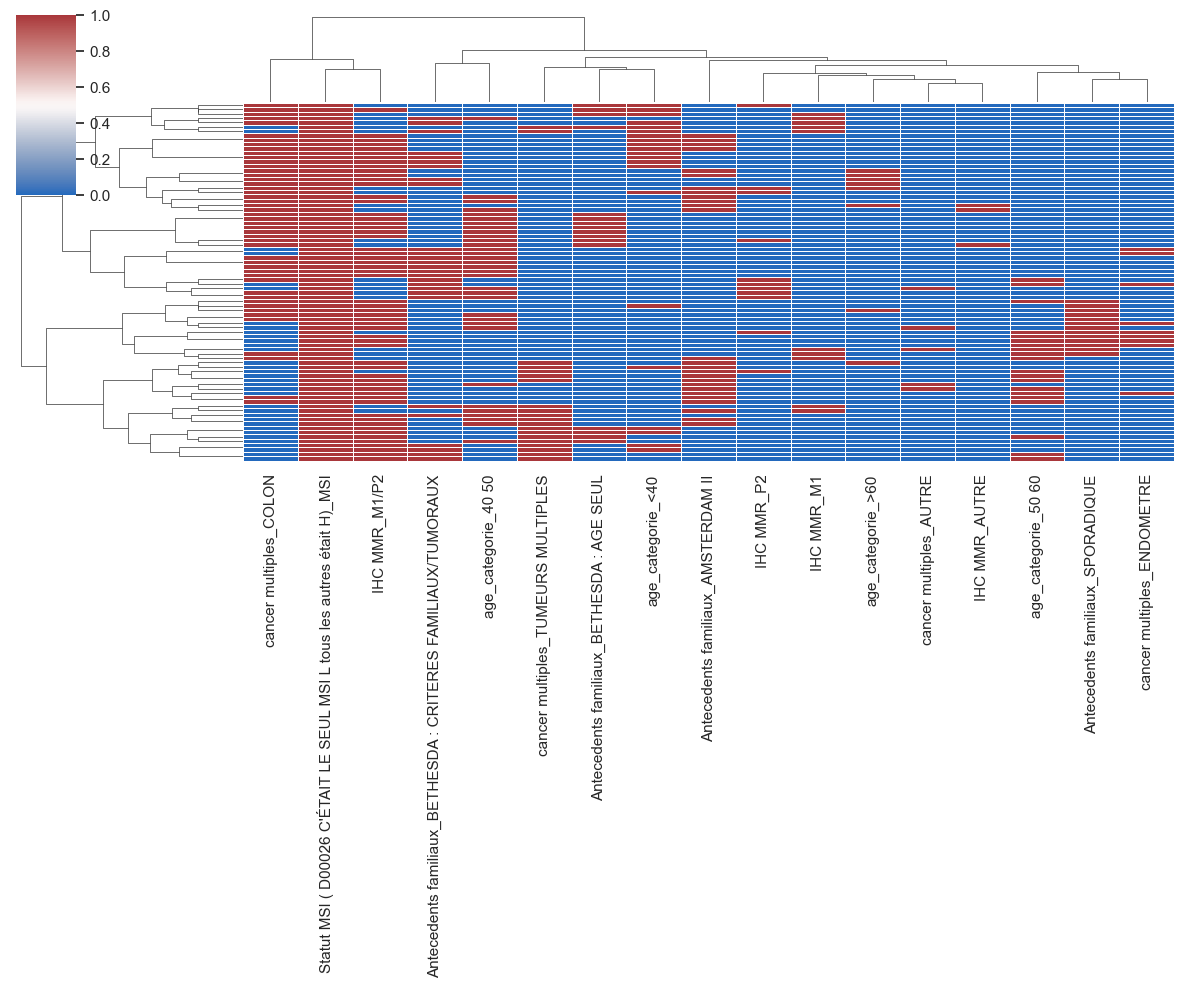

In [ ]:
#clustered CAH heatmap sur les données de la matrice disjonctive (donnée brut patientxmodalité plus bruité et differents des données des axes ACM utilisé par K MEANS)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# ----------------- CONFIG -----------------
sns.set_style("whitegrid")
sns.set_palette("Set2")

# ----------------- MATRICE INDICATRICE -----------------
# D : matrice indicatrice (n individus x K modalités)
# individus_plot : DataFrame avec colonnes pour target (muté/methylé/methylation secondaire)
# feature_names : noms des modalités
# Exemple : D, individus_plot, feature_names doivent être déjà créés à partir de ton ACM

# ----------------- LIEN HIERARCHIQUE -----------------
# Clustering hiérarchique sur les individus
linkage_rows = linkage(D, method='ward', metric='euclidean')
# Clustering hiérarchique sur les colonnes
linkage_cols = linkage(D.T, method='ward', metric='euclidean')


# ----------------- CLUSTERED HEATMAP -----------------
plt.figure(figsize=(12,10))
g = sns.clustermap(
    D,
    row_linkage=linkage_rows,
    col_linkage=linkage_cols,
    row_cluster=True,
    col_cluster=True,
    cmap="vlag",
    linewidths=0.5,
    figsize=(12,10),
    xticklabels=feature_names,
    yticklabels=False  # on peut mettre False si trop d'individus
)

# Colorer les lignes selon target
targets = individus_plot['target'].map({'muté':'red', 'methylé':'blue', 'methylation secondaire':'green'})
for ytick, color in zip(g.ax_heatmap.get_yticklabels(), targets):
    ytick.set_color(color)

plt.show()


Taille des clusters CAH (nombre d'individus) :
cluster_cah
1     7
2    20
3    21
4     9
5    21
Name: count, dtype: int64


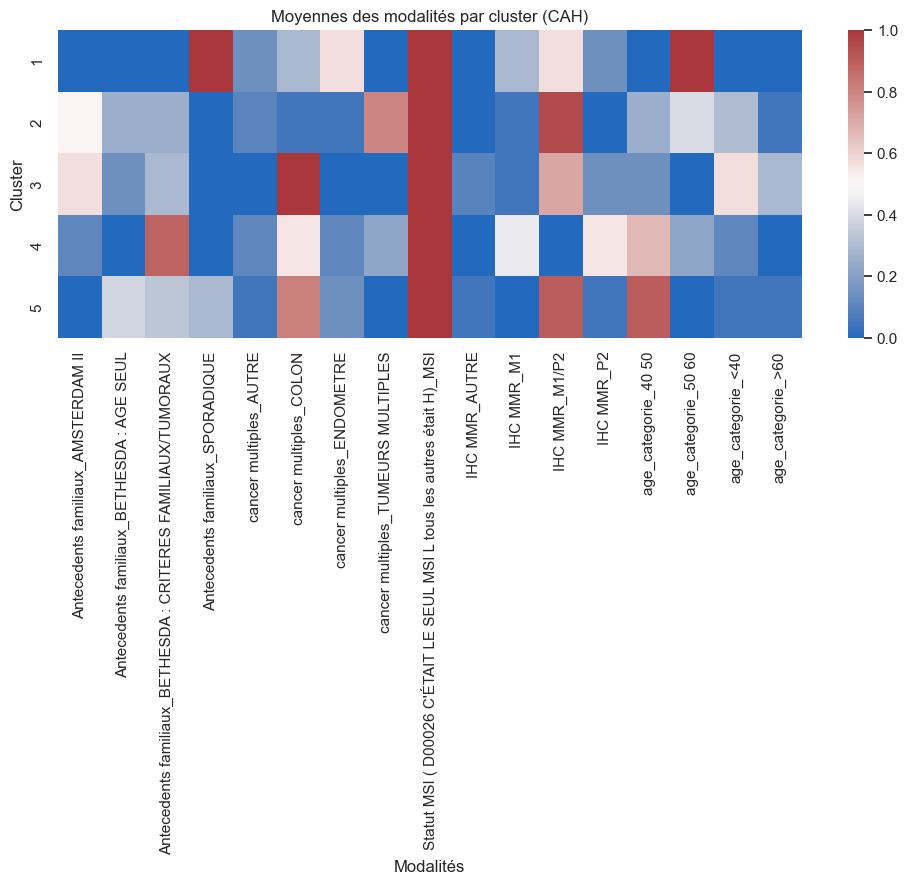


--- Proportions des modalités par cluster (pour chaque variable catégorielle) ---

Variable : Antecedents familiaux


Antecedents familiaux,AMSTERDAM II,BETHESDA : AGE SEUL,BETHESDA : CRITERES FAMILIAUX/TUMORAUX,SPORADIQUE
cluster_cah,,,,
1,0.000,0.000,0.000,1.000
2,0.500,0.250,0.250,0.000
3,0.571,0.143,0.286,0.000
4,0.111,0.000,0.889,0.000
5,0.000,0.381,0.333,0.286



Variable : cancer multiples


cancer multiples,AUTRE,COLON,ENDOMETRE,TUMEURS MULTIPLES
cluster_cah,,,,
1,0.143,0.286,0.571,0.000
2,0.100,0.050,0.050,0.800
3,0.000,1.000,0.000,0.000
4,0.111,0.556,0.111,0.222
5,0.048,0.810,0.143,0.000



Variable : Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)


Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H),MSI
cluster_cah,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0



Variable : IHC MMR


IHC MMR,AUTRE,M1,M1/P2,P2
cluster_cah,,,,
1,0.000,0.286,0.571,0.143
2,0.000,0.050,0.950,0.000
3,0.095,0.048,0.714,0.143
4,0.000,0.444,0.000,0.556
5,0.048,0.000,0.905,0.048



Variable : age_categorie


age_categorie,<40,40 50,50 60,>60
cluster_cah,,,,
1,0.000,0.000,1.000,0.000
2,0.300,0.250,0.400,0.050
3,0.571,0.143,0.000,0.286
4,0.111,0.667,0.222,0.000
5,0.048,0.905,0.000,0.048



--- Modalités les plus caractéristiques par cluster (top 5) ---

Cluster 1 (n=7 individus) :
  Antecedents familiaux_SPORADIQUE : 1.000
  age_categorie_50 60 : 1.000
  Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)_MSI : 1.000
  IHC MMR_M1/P2 : 0.571
  cancer multiples_ENDOMETRE : 0.571

Cluster 2 (n=20 individus) :
  Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)_MSI : 1.000
  IHC MMR_M1/P2 : 0.950
  cancer multiples_TUMEURS MULTIPLES : 0.800
  Antecedents familiaux_AMSTERDAM II : 0.500
  age_categorie_50 60 : 0.400

Cluster 3 (n=21 individus) :
  Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)_MSI : 1.000
  cancer multiples_COLON : 1.000
  IHC MMR_M1/P2 : 0.714
  Antecedents familiaux_AMSTERDAM II : 0.571
  age_categorie_<40 : 0.571

Cluster 4 (n=9 individus) :
  Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)_MSI : 1.000
  Antecedents familiaux_BETHESDA : CRITERES FAMILIAUX/TUMORAUX : 0.889
  age_categori

In [ ]:
#heatmap d'analyse du CAH
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# --------- PARAMS ---------
K = 5   # <-- choisir le nombre de clusters souhaité pour découper l'arbre
cmap = "vlag"

# --------- (re)calcul linkage si nécessaire ---------
# on suppose D est la matrice indicatrice (n_individus x n_modalités)
if 'linkage_rows' not in globals():
    linkage_rows = linkage(D, method='ward', metric='euclidean')
if 'linkage_cols' not in globals():
    linkage_cols = linkage(D.T, method='ward', metric='euclidean')

# --------- découpage de l'arbre en K clusters ---------
clusters = fcluster(linkage_rows, t=K, criterion='maxclust')
individus_plot = individus_plot.copy()  # sécurité
individus_plot['cluster_cah'] = clusters

# afficher tailles
print("Taille des clusters CAH (nombre d'individus) :")
print(individus_plot['cluster_cah'].value_counts().sort_index())

# --------- construire DataFrame indicatrice (index = individus) ---------
df_indicator = pd.DataFrame(D, index=individus_plot.index, columns=feature_names)

# --------- moyenne des modalités par cluster (heatmap résumé) ---------
cluster_means = df_indicator.groupby(individus_plot['cluster_cah']).mean()
plt.figure(figsize=(12, max(4, 0.5 * cluster_means.shape[0])))
sns.heatmap(cluster_means, cmap=cmap, annot=False, cbar=True)
plt.title("Moyennes des modalités par cluster (CAH)")
plt.xlabel("Modalités")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

# --------- tableaux de proportions pour variables catégorielles ---------
# Si tu as 'categorical_cols' défini, on l'utilise, sinon on l'infère
try:
    categorical_cols  # si existe, on l'utilise
except NameError:
    categorical_cols = [c for c in individus_plot.columns
                        if individus_plot[c].dtype == 'O' and c not in ['target']]

print("\n--- Proportions des modalités par cluster (pour chaque variable catégorielle) ---")
for col in categorical_cols:
    print(f"\nVariable : {col}")
    prop = individus_plot.groupby('cluster_cah')[col].value_counts(normalize=True).unstack(fill_value=0)
    display(prop.round(3))

# --------- Modalités dominantes par cluster (top modalities) ---------
print("\n--- Modalités les plus caractéristiques par cluster (top 5) ---")
topn = 5
for cl in sorted(cluster_means.index):
    print(f"\nCluster {cl} (n={(individus_plot['cluster_cah']==cl).sum()} individus) :")
    top = cluster_means.loc[cl].sort_values(ascending=False).head(topn)
    for mod, val in top.items():
        print(f"  {mod} : {val:.3f}")

# --------- clustermap ordonné par cluster + couleur de ligne (pratique visuel) ---------
# ordonner les individus par cluster pour obtenir blocs visibles
order_idx = individus_plot.sort_values('cluster_cah').index
df_ord = df_indicator.loc[order_idx]

# ligne de couleur par cluster
unique_clusters = sorted(individus_plot['cluster_cah'].unique())
palette = sns.color_palette("Set2", n_colors=len(unique_clusters))
cluster_color_map = {c: palette[i] for i,c in enumerate(unique_clusters)}
row_colors = individus_plot['cluster_cah'].map(cluster_color_map).loc[order_idx]



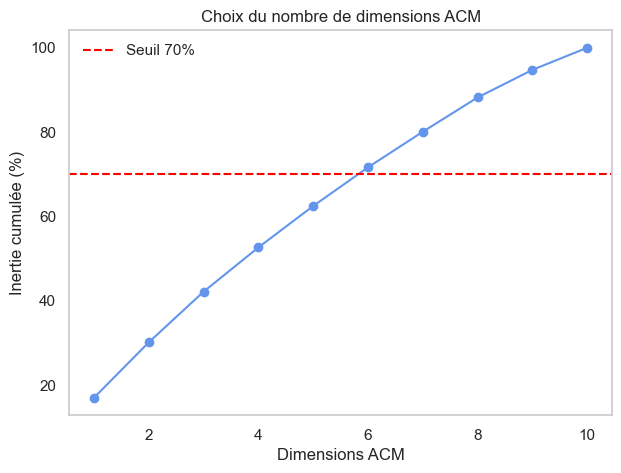

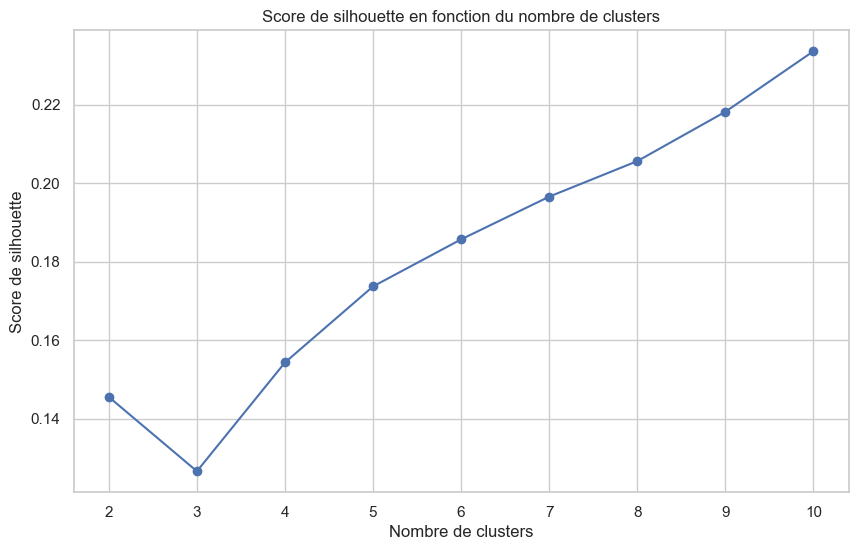

In [ ]:
#tester le nombre d'axe de mon ACM pour quantifier l'inertie
import numpy as np
import matplotlib.pyplot as plt

cumulative_explained = np.cumsum(explained)
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cumulative_explained)+1), cumulative_explained, 'o-', color='cornflowerblue')
plt.axhline(70, color='red', linestyle='--', label='Seuil 70%')
plt.xlabel("Dimensions ACM")
plt.ylabel("Inertie cumulée (%)")
plt.title("Choix du nombre de dimensions ACM")
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import silhouette_score

# Essayer différentes valeurs de k
silhouette_scores = []
k_range = range(2, 11)  # Testez de 2 à 10 clusters

for k in k_range:
    labels = fcluster(linkage_rows, k, criterion='maxclust')
    silhouette_scores.append(silhouette_score(D, labels, metric='euclidean'))

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.grid(True)
plt.show()

In [ ]:
#code a tester CAH sur les données de l'ACM et pas les données brut de la matrice disjonctive pour voir si le clustering se fait mieux
# ----------------- IMPORTS -----------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# ----------------- CONFIG -----------------
sns.set_style("whitegrid")
sns.set_palette("Set2")

# ----------------- COORDONNEES MCA -----------------
# coords : DataFrame avec les coordonnées des individus sur les axes MCA
# individus_plot : DataFrame avec colonnes pour target (muté/methylé/methylation secondaire)
# feature_names : noms des modalités (pour heatmap, si tu veux)

# ----------------- LIEN HIERARCHIQUE -----------------
# Clustering hiérarchique sur les individus à partir des coordonnées MCA
linkage_rows = linkage(coords.values, method='ward', metric='euclidean')

# Si tu veux faire une CAH sur les colonnes MCA, c'est moins fréquent,
# mais tu pourrais aussi calculer linkage_cols à partir des axes factoriels des modalités
# linkage_cols = linkage(MCA.column_coordinates(D).values, method='ward', metric='euclidean')

# ----------------- CLUSTERED HEATMAP -----------------
plt.figure(figsize=(12,10))
g = sns.clustermap(
    coords,  # on utilise coords MCA ici
    row_linkage=linkage_rows,
    # col_linkage=linkage_cols,  # décommenter si tu veux cluster les colonnes
    row_cluster=True,
    col_cluster=False,  # souvent on ne cluster pas les colonnes MCA
    cmap="vlag",
    linewidths=0.5,
    figsize=(12,10),
    xticklabels=True,  # ou coords.columns
    yticklabels=False
)

# Colorer les lignes selon target
targets = individus_plot['target'].map({'muté':'red', 'methylé':'blue', 'methylation secondaire':'green'})
for ytick, color in zip(g.ax_heatmap.get_yticklabels(), targets):
    ytick.set_color(color)

plt.show()


: 

In [ ]:
# UMAP directement sur les données brutes (table disjonctive) + clustering secondaire
# - encodage OneHot (D)
# - UMAP (metric='jaccard') sur D
# - KMeans (ou autre) sur l'embedding UMAP
# - diagnostics (silhouette, Calinski-Harabasz, Davies-Bouldin, ARI si target)
# - visualisations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score, calinski_harabasz_score,
                             davies_bouldin_score, adjusted_rand_score)
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# ---------- PARAMÈTRES (modifie si besoin) ----------
INPUT_PATH = r"C:\\Users\\stude\\OneDrive\\Bureau\\these_version_ultime\\recueil.xlsx"
FEATURES = [
    'age de la premiere tumeur lynch',
    'Antecedents familiaux',
    'cancer multiples',
    "Statut MSI ( D00026 C'ÉTAIT LE SEUL MSI L tous les autres était H)",
    'IHC MMR'
]
MIN_FREQ_FOR_RARE = 4
PRESERVE_MODALITIES = ['AMSTERDAM II', 'AMSTERDAM']
K_TO_TEST = 4                      # k pour KMeans sur UMAP (changeable)
UMAP_N_NEIGHBORS = 15
UMAP_MIN_DIST = 0.1
UMAP_N_COMPONENTS = 2
RANDOM_STATE = 42
EXPORT_EMBEDDING = False           # True pour sauver emb.csv
REMOVE_MODALITIES = [              # modalités (normalisées) à supprimer / transformer en NaN
    "STATUT MSI ( D00026 C'ÉTAIT LE SEUL MSI L TOUS LES AUTRES ÉTAIT H)",
    "IHC MMR AUTRE",
    "ANTECEDENTS FAMILIAUX NR"
]

# ---------- Vérifier umap ----------
try:
    import umap
except Exception as e:
    raise ImportError("Il manque 'umap-learn'. Installez-le avec `pip install umap-learn` puis relancez.") from e

# ---------- utilitaires ----------
def normalize_str(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().upper()
    s = unicodedata.normalize('NFKD', s).encode('ASCII','ignore').decode('ASCII')
    s = s.replace('_', ' ').replace('-', ' ')
    s = ' '.join(s.split())
    return s

# ---------- CHARGEMENT & PREPROCESS ----------
df = pd.read_excel(INPUT_PATH).copy()

# target - garder éventuellement 2 ou 3 catégories ; ici on garde tout si présent
if 'muté/methylé' in df.columns:
    df['target'] = df['muté/methylé'].astype(str).str.strip().str.lower()
else:
    df['target'] = np.nan

# ne garder que FEATURES existants
FEATURES = [c for c in FEATURES if c in df.columns]
if not FEATURES:
    raise ValueError("Aucune des colonnes demandées n'existe dans le fichier.")

acm_df = df[FEATURES + ['target']].copy()

# convertir âge en catégories si présent
if 'age de la premiere tumeur lynch' in acm_df.columns:
    acm_df['age_num'] = pd.to_numeric(acm_df['age de la premiere tumeur lynch'], errors='coerce')
    acm_df = acm_df.dropna(subset=['age_num'])
    acm_df['age_categorie'] = pd.cut(acm_df['age_num'], bins=[0,40,50,60,120],
                                     labels=['<40','40-50','50-60','>60'])
else:
    acm_df['age_categorie'] = 'INCONNU'

categorical_cols = [c for c in FEATURES if c != 'age de la premiere tumeur lynch'] + ['age_categorie']

# normalisation textuelle et suppression modalités indésirables
for col in categorical_cols:
    acm_df[col] = acm_df[col].apply(normalize_str)
    # remplacer tokens classiques par NaN
    acm_df[col] = acm_df[col].replace({'NAN': np.nan, 'NONE': np.nan, 'NA': np.nan, 'N/A': np.nan, 'N R': np.nan, 'N/R': np.nan, 'NR': np.nan})
    # supprimer modalités explicitement listées
    acm_df[col] = acm_df[col].replace({m: np.nan for m in REMOVE_MODALITIES})

# drop lignes où il manque une valeur sur les colonnes catégorielles choisies
before = len(acm_df)
acm_df = acm_df.dropna(subset=categorical_cols).reset_index(drop=True)
after = len(acm_df)
print(f"Individus avant nettoyage: {before} → après suppression manquants & modalités non pertinentes: {after}")

# regrouper modalités rares en 'AUTRE' (sauf PRESERVE_MODALITIES)
for col in categorical_cols:
    counts = acm_df[col].value_counts()
    rare = counts[counts < MIN_FREQ_FOR_RARE].index.tolist()
    rare = [r for r in rare if r not in PRESERVE_MODALITIES]
    if rare:
        acm_df[col] = acm_df[col].replace(rare, 'AUTRE')
    print(f"{col}: modalités finales = {acm_df[col].nunique()}")

# ---------- ENCODAGE DISJONCTIF (D) ----------
try:
    encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
except TypeError:
    encoder = OneHotEncoder(sparse=False, drop=None, handle_unknown='ignore')

D = encoder.fit_transform(acm_df[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
D = np.asarray(D, dtype=float)
n, K = D.shape
print(f"Matrice indicatrice: n={n}, K={K}")

# ---------- UMAP sur la table binaire (metric='jaccard') ----------
reducer = umap.UMAP(n_neighbors=UMAP_N_NEIGHBORS,
                    min_dist=UMAP_MIN_DIST,
                    n_components=UMAP_N_COMPONENTS,
                    metric='jaccard',
                    random_state=RANDOM_STATE)
emb = reducer.fit_transform(D)   # shape (n, 2)

if EXPORT_EMBEDDING:
    pd.DataFrame(emb, columns=[f"UMAP{i+1}" for i in range(emb.shape[1])]).to_csv("umap_on_D.csv", index=False)
    print("Embedding UMAP exporté en umap_on_D.csv")

# ---------- Clustering sur embedding UMAP ----------
k = int(K_TO_TEST)
km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=50)
labels = km.fit_predict(emb)

# ---------- Diagnostics ----------
def safe_metric(func, X, labels):
    try:
        return func(X, labels)
    except Exception:
        return np.nan

sil = safe_metric(silhouette_score, emb, labels)
ch = safe_metric(calinski_harabasz_score, emb, labels)
db = safe_metric(davies_bouldin_score, emb, labels)
ari = np.nan
if 'target' in acm_df.columns and acm_df['target'].notna().any():
    try:
        # map target to integers consistently
        unique_targets = sorted(acm_df['target'].unique())
        tmap = {v:i for i,v in enumerate(unique_targets)}
        target_labels = acm_df['target'].map(tmap).values
        ari = adjusted_rand_score(target_labels, labels)
    except Exception:
        ari = np.nan

sizes = np.bincount(labels, minlength=k)

print("\n--- Diagnostics clustering sur UMAP(D) ---")
print(f"k = {k} | silhouette = {sil:.4f} | Calinski-H = {ch:.2f} | Davies-Bouldin = {db:.4f}")
print(f"Sizes par cluster: {list(sizes)} | ARI vs target: {ari:.4f}")

# ---------- Visualisations ----------
palette_target = {'muté':'red', 'methylé':'blue', 'methylation secondaire':'green'}
colors_target = [palette_target.get(t, 'gray') for t in acm_df['target'].values]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(emb[:,0], emb[:,1], c=colors_target, s=50, alpha=0.85, edgecolor='w')
plt.title("UMAP(D) — coloré par target")
plt.xlabel("UMAP1"); plt.ylabel("UMAP2")

plt.subplot(1,2,2)
plt.scatter(emb[:,0], emb[:,1], c=labels, cmap='Set2', s=50, alpha=0.85, edgecolor='w')
plt.title(f"UMAP(D) — KMeans k={k} (sil={sil:.3f})")
plt.xlabel("UMAP1"); plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

# ---------- Profilage des clusters (sur variables originales) ----------
acm_df['cluster_umap'] = labels
print("\n--- Répartition des variables par cluster (UMAP(D) KMeans) ---")
for col in categorical_cols + ['target']:
    print(f"\n>>> {col} :")
    tab = pd.crosstab(acm_df['cluster_umap'], acm_df[col], normalize='index') * 100
    print(tab.round(1).fillna(0).to_string())

# ---------- Option alternative : CAH (Jaccard) sur D pour comparaison ----------
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import pairwise_distances

print("\nCalcul CAH (linkage) sur distance Jaccard pour comparaison (peut être lent si grand n)...")
dist = pairwise_distances(D, metric='jaccard')
Z = linkage(dist, method='average')   # average often works well with Jaccard
# découpage en k clusters
labels_cah = fcluster(Z, k, criterion='maxclust')
print("Sizes CAH (Jaccard) :", np.bincount(labels_cah-1, minlength=k))

# (facultatif) dendrogramme tronqué
plt.figure(figsize=(12,5))
dendrogram(Z, truncate_mode='lastp', p=40, leaf_rotation=90., no_labels=True)
plt.title("Dendrogramme (CAH sur Jaccard) - tronqué")
plt.xlabel("Merges"); plt.ylabel("Distance")
plt.show()

print("\nTerminé.")



: 

In [ ]:
import umap
print("UMAP OK — version:", umap.__version__)


: 